In [472]:
import sagemaker

In [473]:
from sklearn.model_selection import train_test_split

In [474]:
import boto3
# boto3 is used to connect to s3 bucket

In [475]:
import pandas as pd

In [476]:
import boto3
import sagemaker

region = 'ap-south-1'  # ✅ Use your actual region here
boto_sess = boto3.Session(region_name=region)
sm_boto3 = boto_sess.client('sagemaker')
sess = sagemaker.Session(boto_session=boto_sess)

bucket = 'sagemaker-ap-south-1-yourname'
print('Using bucket', bucket)


INFO:botocore.credentials:Found credentials in shared credentials file: ~/.aws/credentials


Using bucket sagemaker-ap-south-1-yourname


In [477]:
df=pd.read_csv('train.csv')

In [478]:
type(df)

pandas.core.frame.DataFrame

In [479]:
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [480]:
df['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [481]:
# hence classification problem

In [482]:
df.shape

(2000, 21)

In [483]:
df['price_range'].value_counts(normalize=True)

price_range
1    0.25
2    0.25
3    0.25
0    0.25
Name: proportion, dtype: float64

In [484]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [485]:
df.isnull().mean()*100

battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
price_range      0.0
dtype: float64

In [486]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [487]:
features=list(df.columns)

In [488]:
features

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [489]:
label=features.pop(-1)
label

'price_range'

In [490]:
x=df[features]
y=df[label]

In [491]:
x.shape

(2000, 20)

In [492]:
y.shape

(2000,)

In [493]:
x.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  
0        0             0     1  
1        1             1     0  
2        1             1     0  
3        1             0     0  
4        1             1     0

In [494]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [495]:
y.value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [496]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=42)

In [497]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1700, 20)
(300, 20)
(1700,)
(300,)


In [498]:
trainX=pd.DataFrame(x_train)

In [499]:
trainX[label]=y_train


In [500]:
trainX.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
581            1512     1          0.5         0   8       1          18   
76             1114     0          2.8         0   4       1           9   
1916           1176     1          2.1         0   2       1          62   
1414           1550     1          2.7         0   2       0          32   
780            1042     0          2.2         0  15       1          11   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
581     0.1         88        3  ...       1079      1897  3607    12    10   
76      0.4        197        3  ...       1040      1071   907    10     7   
1916    0.5        168        2  ...        674      1455  1534     6     2   
1414    0.1        126        7  ...       1541      1619  1571    12     3   
780     0.6        139        5  ...         68      1018  2826    18     0   

      talk_time  three_g  touch_screen  wifi  price_range  
581           6        1             1     1            3  
76           17        1             1     0            0  
1916         17        1             0     0            1  
1414         14        0             0     0            2  
780           2        1             0     0            2  

[5 rows x 21 columns]

In [501]:
testX=pd.DataFrame(x_test)

In [502]:
testX[label]=y_test

In [503]:
print(trainX.shape)

(1700, 21)


In [504]:
print(testX.shape)

(300, 21)


In [505]:
trainX.shape

(1700, 21)

In [506]:
trainX.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [507]:
testX.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [508]:
trainX.to_csv('trainX-v1.csv',index=False)

In [509]:
testX.to_csv('testX-v1.csv',index=False)

In [510]:
# senddata to s3, sagemaker will take training data from s3

sk_prefix="sagemaker/mobile_price_classification/sklearncontainer"
train_path=sess.upload_data(path='trainX-v1.csv',bucket=bucket,key_prefix=sk_prefix)

In [511]:
test_path=sess.upload_data(path='testX-v1.csv',bucket=bucket,key_prefix=sk_prefix)

In [512]:
train_path='s3://sagemaker-ap-south-1-yourname/sagemaker/mobile_price_classification/sklearncontainer/'

In [513]:
test_path='s3://sagemaker-ap-south-1-yourname/sagemaker/mobile_price_classification/sklearncontainer/'

In [514]:
%%writefile script.py

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
import sklearn
import joblib
import boto3
import pathlib
from io import StringIO
import argparse
import numpy as np
import pandas as pd
import os

def model_fn(model_dir):
    clf=joblib.load(os.path.join(model_dir,"model.joblib"))
    return clf
if __name__=="__main__":
    print('extracting arguments')
    parser=argparse.ArgumentParser()



    parser.add_argument("--model-dir",type=str,default=os.environ.get('SM_MODEL_DIR'))
    parser.add_argument('--train',type=str,default=os.environ.get('SM_CHANNEL_TRAIN'))
    parser.add_argument('--test',type=str,default=os.environ.get('SM_CHANNEL_TEST'))
    parser.add_argument('--train-file',type=str,default='trainX-v1.csv')
    parser.add_argument('--test-file',type=str,default='testX-v1.csv')
    parser.add_argument("--n_estimators", type=int, default=10)
    parser.add_argument("--random_state", type=int, default=0)


    args, _=parser.parse_known_args()

    print('Sk learn version: ',sklearn.__version__)
    print('Sk learn version: ',joblib.__version__)

    print('[INFO] reading data')

    print()

    train_df=pd.read_csv(os.path.join(args.train,args.train_file))
    test_df=pd.read_csv(os.path.join(args.test,args.test_file))

    features=list(train_df.columns)
    label=features.pop(-1)

    print('Building training and testing datasets')

    print()

    X_train=train_df[features]
    X_test=test_df[features]
    y_train=train_df[label]
    y_test=test_df[label]

    print('Column order: ')
    print(features)
    print()

    print('Label column is: ',  label)
    print()

    print('Data shape: ')
    print()

    print('--- SHAPE of training data 85%---')
    print(X_train.shape)
    print(y_train.shape)
    print()

    print('SHApe of testing data---')


    print(X_test.shape)
    print(y_test.shape)
    print()


    print('TRaining random model')

    print()

    model=RandomForestClassifier(n_estimators=args.n_estimators,random_state=args.random_state)
    model.fit(X_train,y_train)
    print()

    model_path=os.path.join(args.model_dir,"model.joblib")
    joblib.dump(model,model_path)
    print("Model persisted at",model_path)
    print()

    y_pred_test=model.predict(X_test)
    test_acc=accuracy_score(y_test,y_pred_test)
    test_rep=classification_report(y_test,y_pred_test)

    print()

    print('--testing results for testing data-----')

    print()
    print('total rows are: ',X_test.shape[0])
    print('[Testing] model accuracy is: ',test_acc)
    print('[Testing] testing report: ')
    print(test_rep)

Overwriting script.py


In [515]:



from sagemaker.sklearn.estimator import SKLearn
FRAMEWORK_VERSION="0.23-1"
boto_session = boto3.session.Session(region_name="ap-south-1")
sm_session = sagemaker.Session(boto_session=boto_session)
sklearn_estimator=SKLearn(entry_point='script.py',role='arn:aws:iam::149536490905:role/SageMakerExecutionRole',
                          instance_count=1,
                          instance_type="ml.m5.large",
                          framework_version=FRAMEWORK_VERSION,
                          base_job_name='RF-custom-sklearn',
                          sagemaker_session=sm_session,
                          hyperparameters={'n_estimators':10,
                                           'random_state':0},use_spot_instances=True,max_wait=7200,max_run=3600)

INFO:botocore.credentials:Found credentials in shared credentials file: ~/.aws/credentials


In [516]:
# launch training job, with asynchronous call
sklearn_estimator.fit({"train":train_path,'test':test_path},wait=True)
# sklearn_estimator.fit({"train":datapath},wait=True)

INFO:sagemaker.telemetry.telemetry_logging:SageMaker Python SDK will collect telemetry to help us better understand our user's needs, diagnose issues, and deliver additional features.
To opt out of telemetry, please disable via TelemetryOptOut parameter in SDK defaults config. For more information, refer to https://sagemaker.readthedocs.io/en/stable/overview.html#configuring-and-using-defaults-with-the-sagemaker-python-sdk.
INFO:sagemaker:Creating training-job with name: RF-custom-sklearn-2025-06-29-09-38-58-230


2025-06-29 09:39:06 Starting - Starting the training job...
2025-06-29 09:39:38 Downloading - Downloading input data...
2025-06-29 09:40:04 Downloading - Downloading the training image...
2025-06-29 09:40:44 Training - Training image download completed. Training in progress..2025-06-29 09:40:48,470 sagemaker-containers INFO     Imported framework sagemaker_sklearn_container.training
2025-06-29 09:40:48,473 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2025-06-29 09:40:48,511 sagemaker_sklearn_container.training INFO     Invoking user training script.
2025-06-29 09:40:48,683 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2025-06-29 09:40:48,695 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2025-06-29 09:40:48,706 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2025-06-29 09:40:48,715 sagemaker-training-toolkit INFO     Invoking user script
Trai

In [517]:
sklearn_estimator.latest_training_job.wait(logs="None")
artifact=sm_boto3.describe_training_job(
    TrainingJobName=sklearn_estimator.latest_training_job.name
)["ModelArtifacts"]["S3ModelArtifacts"]

print("Model artifacts persisted at ",artifact)


2025-06-29 09:41:07 Starting - Preparing the instances for training
2025-06-29 09:41:07 Downloading - Downloading the training image
2025-06-29 09:41:07 Training - Training image download completed. Training in progress.
2025-06-29 09:41:07 Uploading - Uploading generated training model
2025-06-29 09:41:07 Completed - Training job completed
Model artifacts persisted at  s3://sagemaker-ap-south-1-149536490905/RF-custom-sklearn-2025-06-29-09-38-58-230/output/model.tar.gz


In [518]:
from sagemaker.sklearn.model import SKLearnModel
from time import gmtime, strftime


model_name="Custome-sklearn-model-"+strftime("%Y-%m-%d-%H-%M-%S",gmtime())


model=SKLearnModel(
    name=model_name,
    model_data=artifact,
    role='arn:aws:iam::149536490905:role/SageMakerExecutionRole',
    entry_point='script.py',
    framework_version=FRAMEWORK_VERSION,
)


In [519]:
model

In [520]:
# endpoint deployment

endpoint_name='Custome-sklearn-model-'+strftime("%Y-%m-%d-%H-%M-%S",gmtime())
print("EndpointName={}".format(endpoint_name))



predictor=model.deploy(
    initial_instance_count=1,
    instance_type='ml.m5.large',
    endpoint_name=endpoint_name
)

EndpointName=Custome-sklearn-model-2025-06-29-09-41-30


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:8                                                                                    │
│                                                                                                  │
│    5                                                                                             │
│    6                                                                                             │
│    7                                                                                             │
│ ❱  8 predictor=model.deploy(                                                                     │
│    9 │   initial_instance_count=1,                                                               │
│   10 │   instance_type='ml.m5.large',                                                            │
│   11 │   endpoint_name=endpoint_name                                                             │
│                                                                                                  │
│ c:\Users\shett\Documents\SageMaker\myenv\lib\site-packages\sagemaker\model.py:1520 in deploy     │
│                                                                                                  │
│   1517 │   │   """                                                                               │
│   1518 │   │   self.accept_eula = accept_eula                                                    │
│   1519 │   │                                                                                     │
│ ❱ 1520 │   │   self._init_sagemaker_session_if_does_not_exist(instance_type)                     │
│   1521 │   │   # Depending on the instance type, a local session (or) a session is initialized.  │
│   1522 │   │   self.role = resolve_value_from_config(                                            │
│   1523 │   │   │   self.role,                                                                    │
│                                                                                                  │
│ c:\Users\shett\Documents\SageMaker\myenv\lib\site-packages\sagemaker\model.py:682 in             │
│ _init_sagemaker_session_if_does_not_exist                                                        │
│                                                                                                  │
│    679 │   │   if instance_type in ("local", "local_gpu"):                                       │
│    680 │   │   │   self.sagemaker_session = local.LocalSession(sagemaker_config=self._sagemaker  │
│    681 │   │   else:                                                                             │
│ ❱  682 │   │   │   self.sagemaker_session = session.Session(sagemaker_config=self._sagemaker_co  │
│    683 │                                                                                         │
│    684 │   def prepare_container_def(                                                            │
│    685 │   │   self,                                                                             │
│                                                                                                  │
│ c:\Users\shett\Documents\SageMaker\myenv\lib\site-packages\sagemaker\session.py:265 in __init__  │
│                                                                                                  │
│    262 │   │   self.lambda_client = None                                                         │
│    263 │   │   self.settings = settings if settings else SessionSettings()                       │
│    264 │   │                                                                                     │
│ ❱  265 │   │   self._initialize(                                                                 │
│    266 │   │   │   boto_session=boto_session,                                                    │
│    267 │   │   │   sagemaker_client=sagemaker_client,      

In [ ]:
# we are making addition folder so that can be given to end point not the main code

In [522]:
endpoint_name



'Custome-sklearn-model-2025-06-29-09-41-30'

In [523]:
predictor

In [524]:
testX[features][0:2].values.tolist()

[[1646.0,
  0.0,
  2.5,
  0.0,
  3.0,
  1.0,
  25.0,
  0.6,
  200.0,
  2.0,
  5.0,
  211.0,
  1608.0,
  686.0,
  8.0,
  6.0,
  11.0,
  1.0,
  1.0,
  0.0],
 [1182.0,
  0.0,
  0.5,
  0.0,
  7.0,
  1.0,
  8.0,
  0.5,
  138.0,
  8.0,
  16.0,
  275.0,
  986.0,
  2563.0,
  19.0,
  17.0,
  19.0,
  1.0,
  0.0,
  0.0]]

In [525]:
print(predictor.predict(testX[features][0:2].values.tolist()))

[0 2]


In [528]:
sm_boto3.delete_endpoint(EndpointName=endpoint_name)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 sm_boto3.delete_endpoint(EndpointName=endpoint_name)                                         │
│   2                                                                                              │
│                                                                                                  │
│ c:\Users\shett\Documents\SageMaker\myenv\lib\site-packages\botocore\client.py:595 in _api_call   │
│                                                                                                  │
│    592 │   │   │   │   │   f"{py_operation_name}() only accepts keyword arguments."              │
│    593 │   │   │   │   )                                                                         │
│    594 │   │   │   # The "self" in this scope is referring to the BaseClient.                    │
│ ❱  595 │   │   │   return self._make_api_call(operation_name, kwargs)                            │
│    596 │   │                                                                                     │
│    597 │   │   _api_call.__name__ = str(py_operation_name)                                       │
│    598                                                                                           │
│                                                                                                  │
│ c:\Users\shett\Documents\SageMaker\myenv\lib\site-packages\botocore\context.py:123 in wrapper    │
│                                                                                                  │
│   120 │   │   │   with start_as_current_context():                                               │
│   121 │   │   │   │   if hook:                                                                   │
│   122 │   │   │   │   │   hook()                                                                 │
│ ❱ 123 │   │   │   │   return func(*args, **kwargs)                                               │
│   124 │   │                                                                                      │
│   125 │   │   return wrapper                                                                     │
│   126                                                                                            │
│                                                                                                  │
│ c:\Users\shett\Documents\SageMaker\myenv\lib\site-packages\botocore\client.py:1058 in            │
│ _make_api_call                                                                                   │
│                                                                                                  │
│   1055 │   │   │   │   "Code"                                                                    │
│   1056 │   │   │   )                                                                             │
│   1057 │   │   │   error_class = self.exceptions.from_code(error_code)                           │
│ ❱ 1058 │   │   │   raise error_class(parsed_response, operation_name)                            │
│   1059 │   │   else:                                                                             │
│   1060 │   │   │   return parsed_response                                                        │
│   1061                                                                                           │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ClientError: An error occurred (ValidationException) when calling the DeleteEndpoint operation: Could not find 
endpoint "Custome-sklearn-model-2025-06-29-09-41-30".

In [529]:
import boto3

# Replace with your region
region = "ap-south-1"

sm_client = boto3.client("sagemaker", region_name=region)

response = sm_client.list_endpoints()

print("Endpoints in region:", region)
for ep in response["Endpoints"]:
    print(f"Name: {ep['EndpointName']}, Status: {ep['EndpointStatus']}")


Endpoints in region: ap-south-1
Name: Custom-sklearn-model2025-06-29-09-21-18, Status: InService


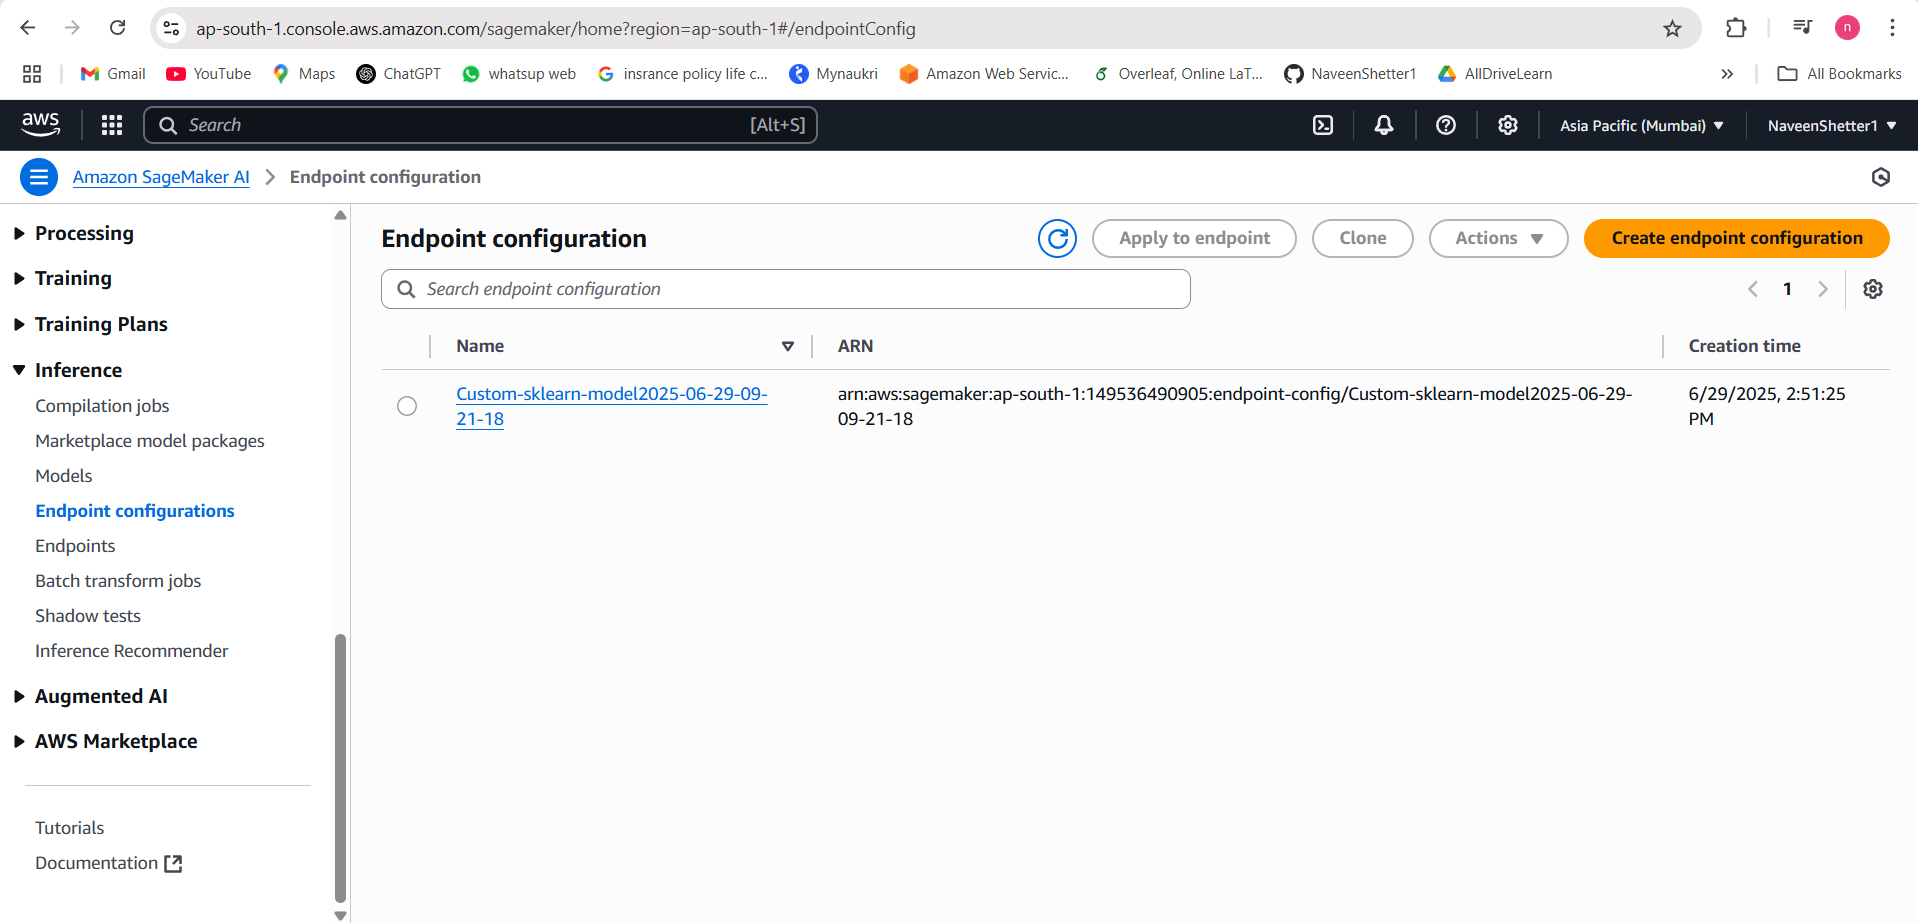

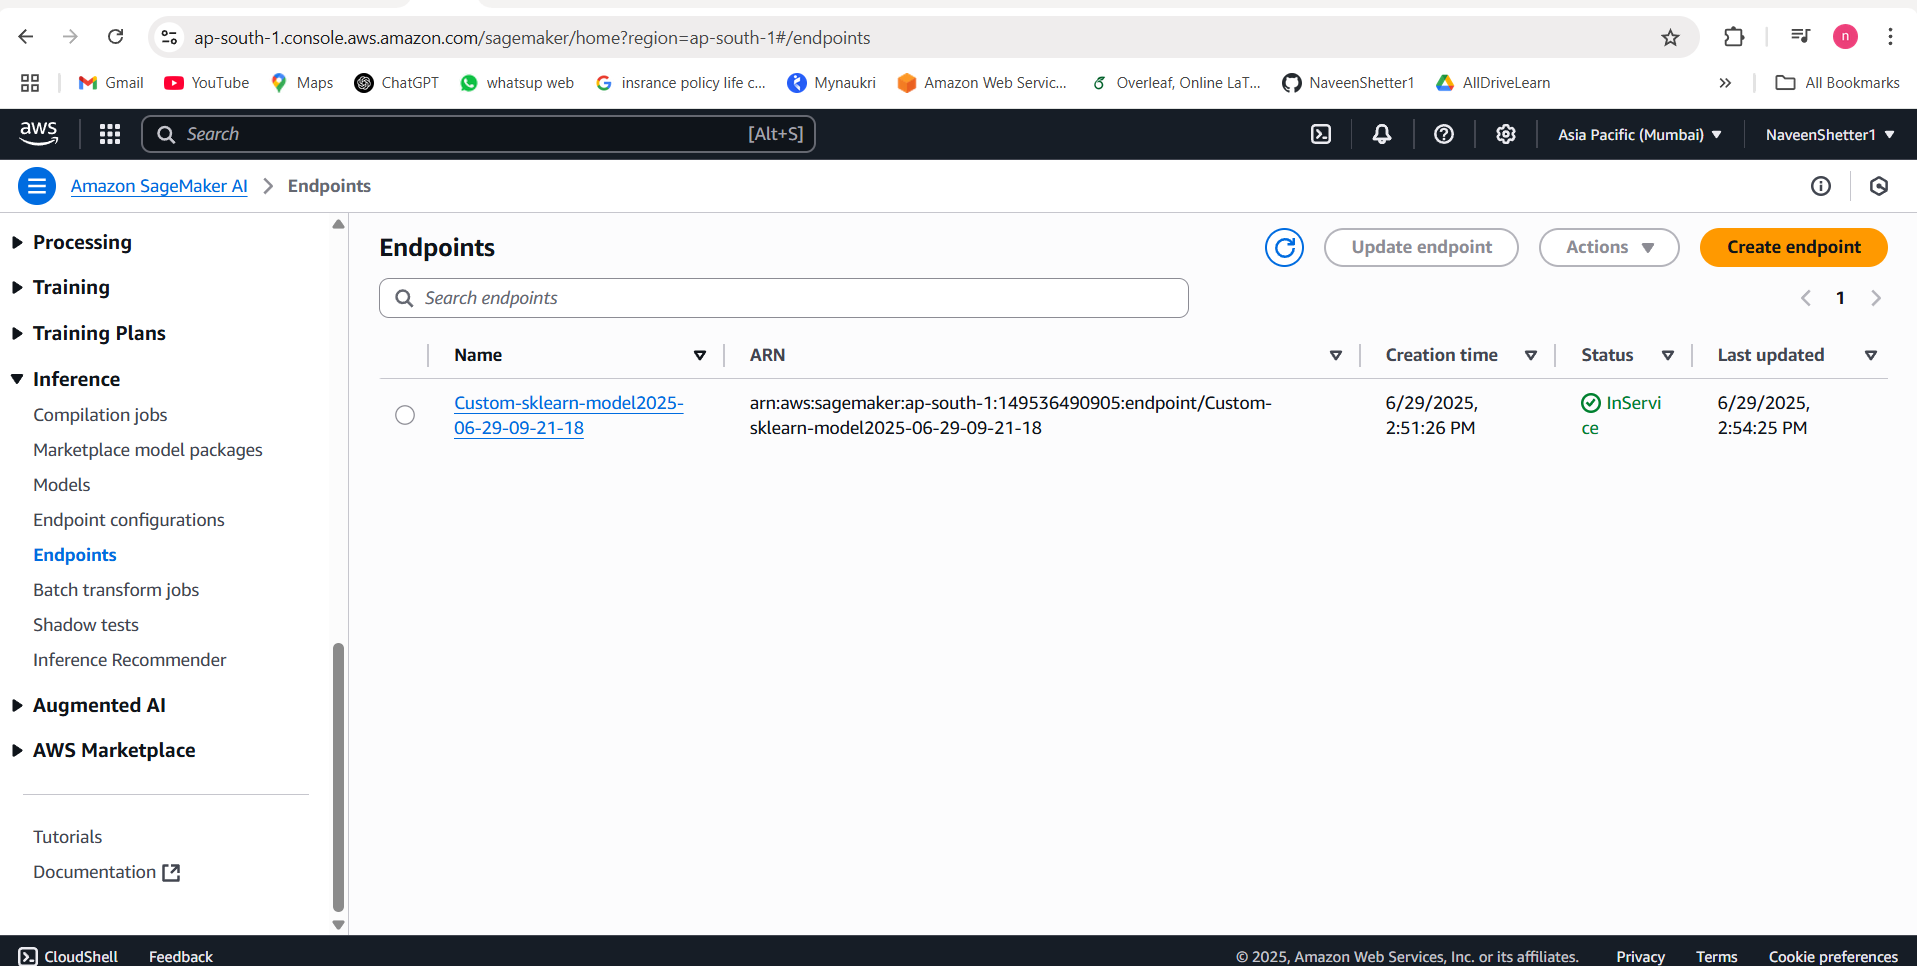

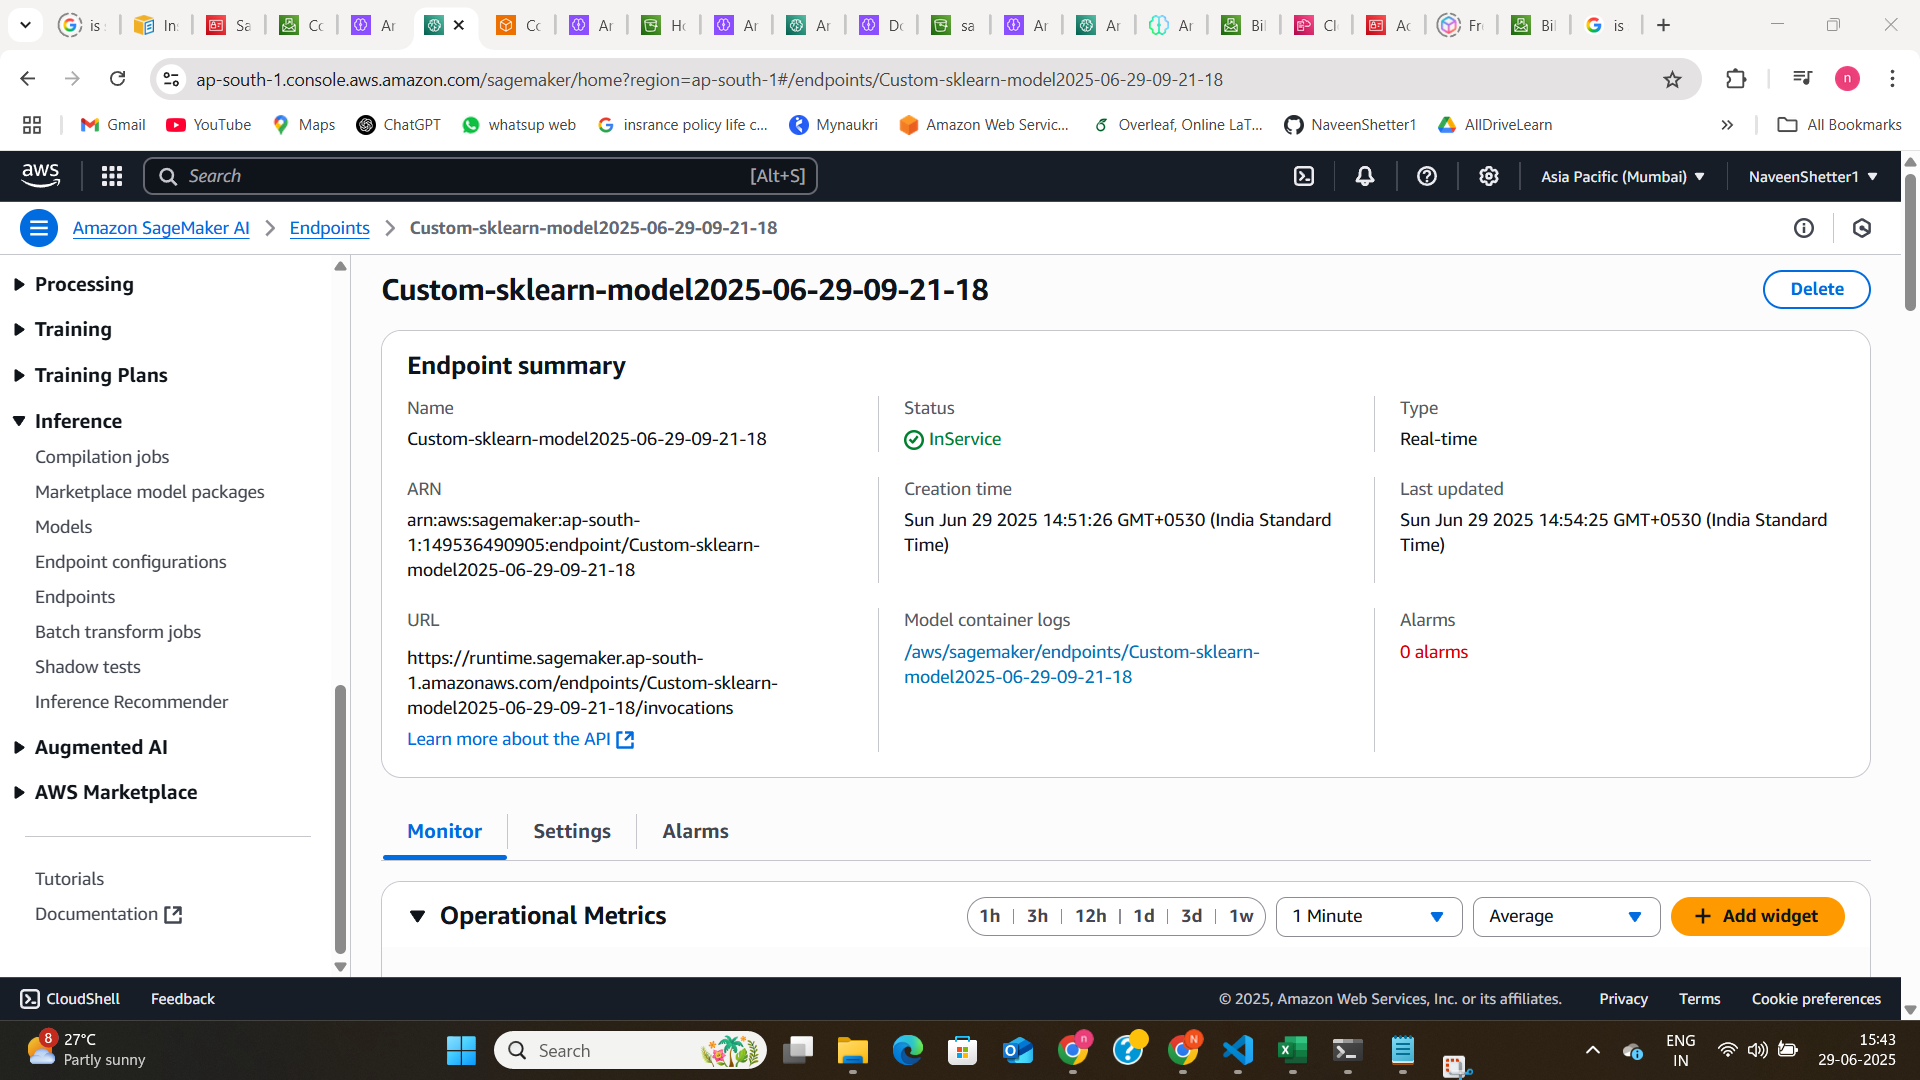

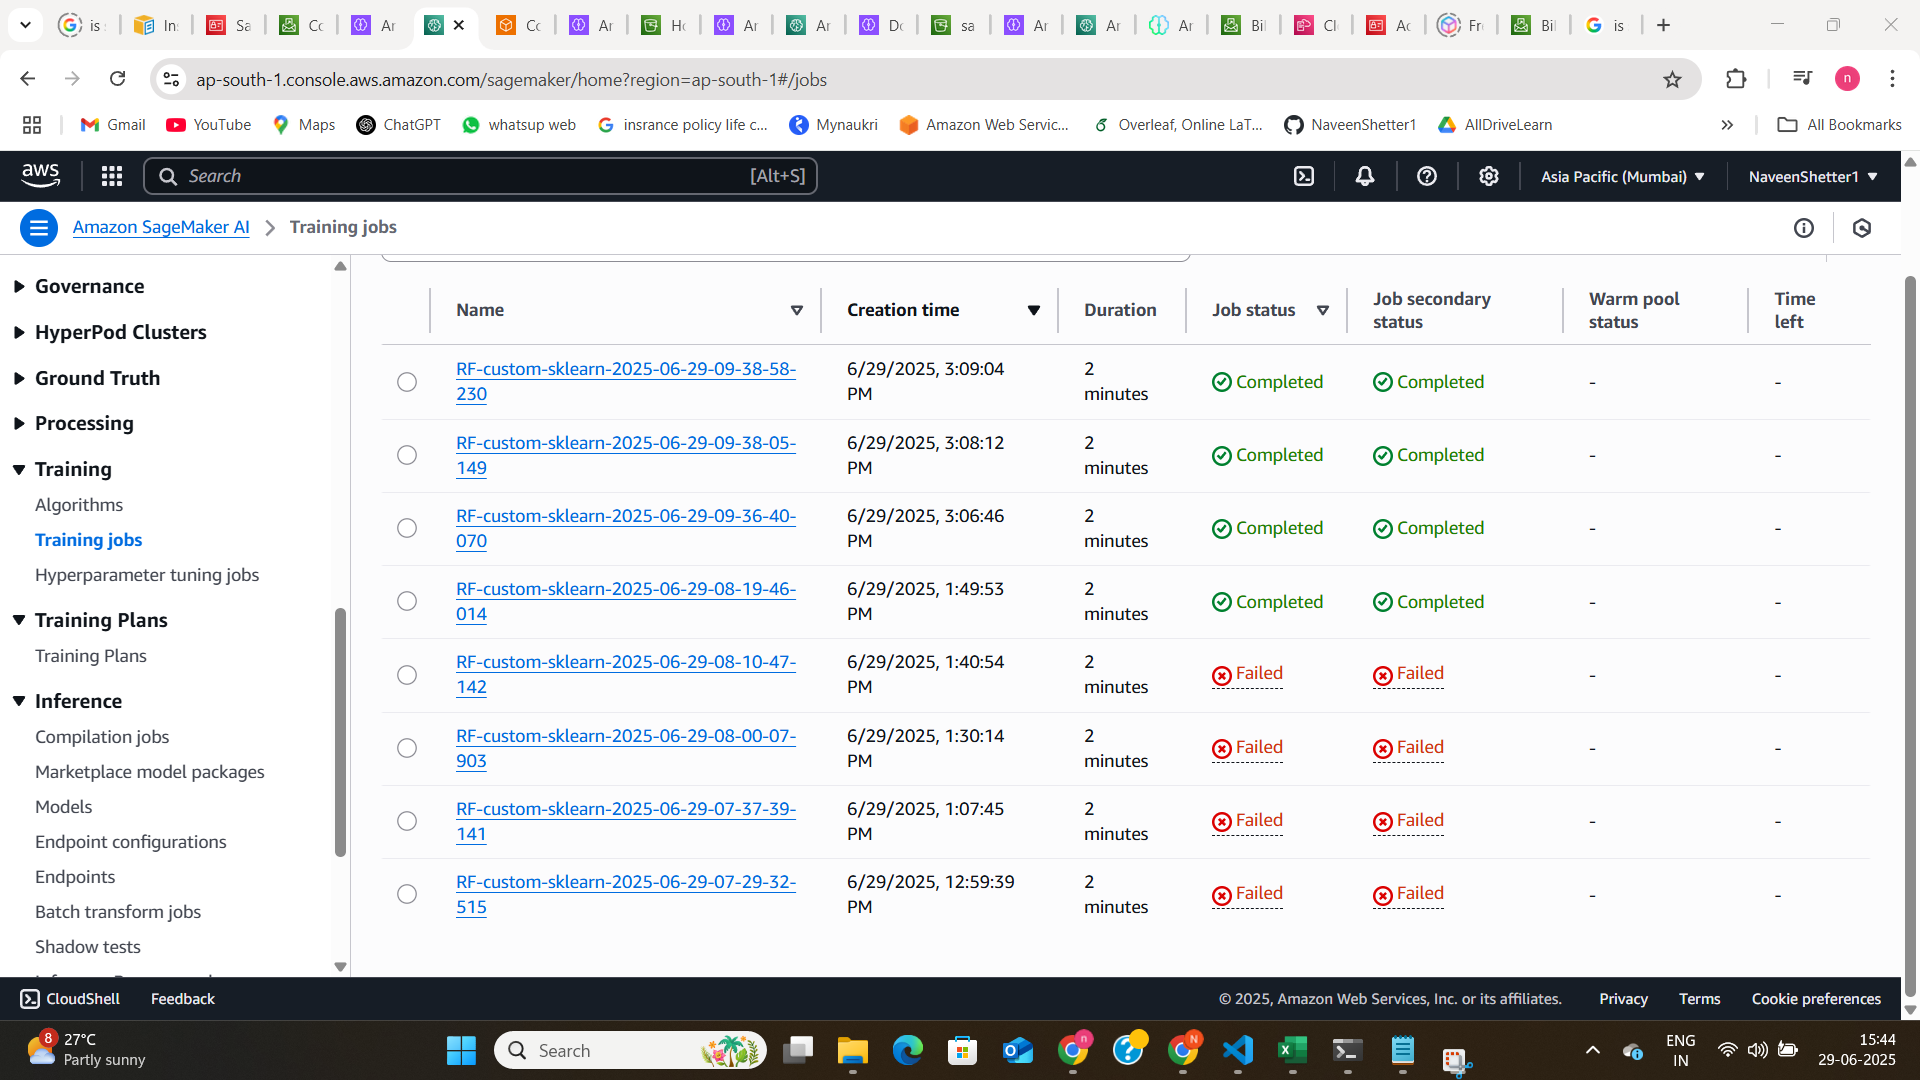

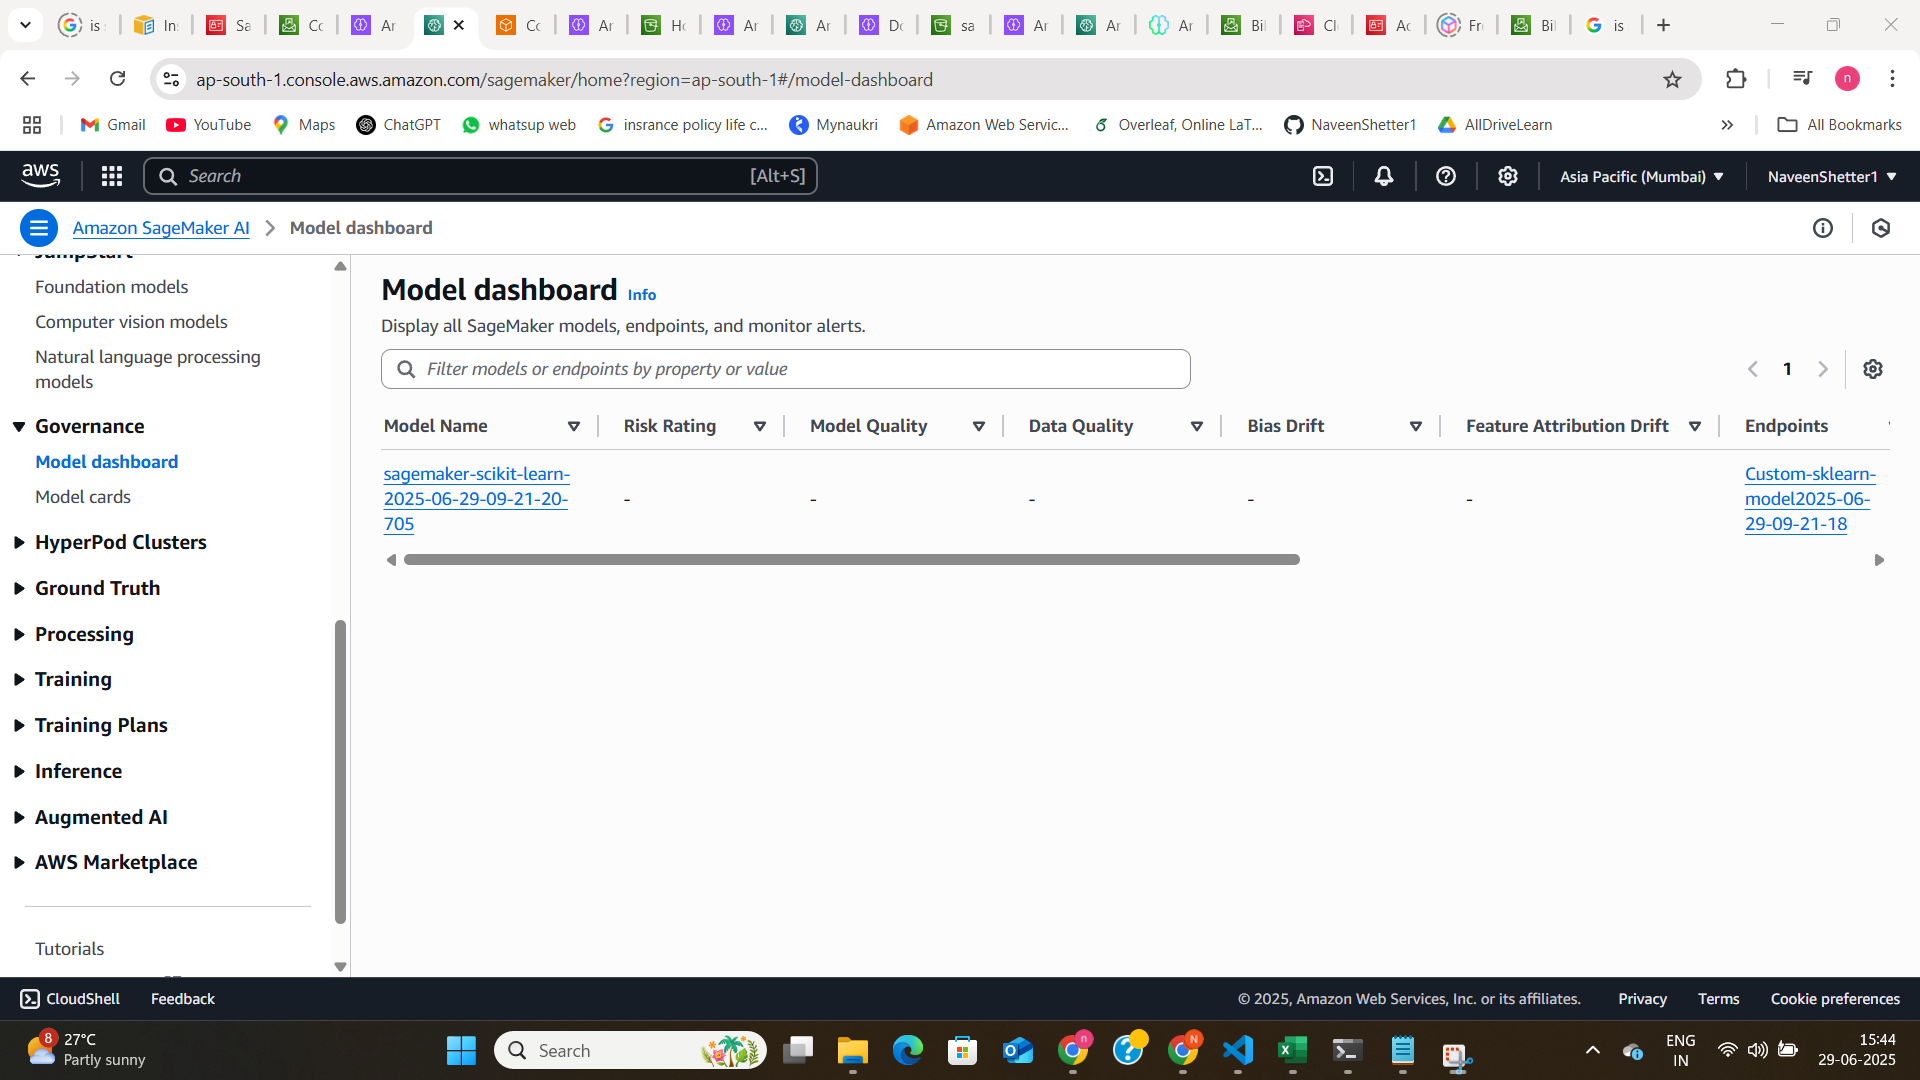

In [530]:
import boto3

region = "ap-south-1"
endpoint_name = "Custom-sklearn-model2025-06-29-09-21-18"

sm_client = boto3.client("sagemaker", region_name=region)

sm_client.delete_endpoint(EndpointName=endpoint_name)
print(f"✅ Deleted endpoint: {endpoint_name}")


✅ Deleted endpoint: Custom-sklearn-model2025-06-29-09-21-18


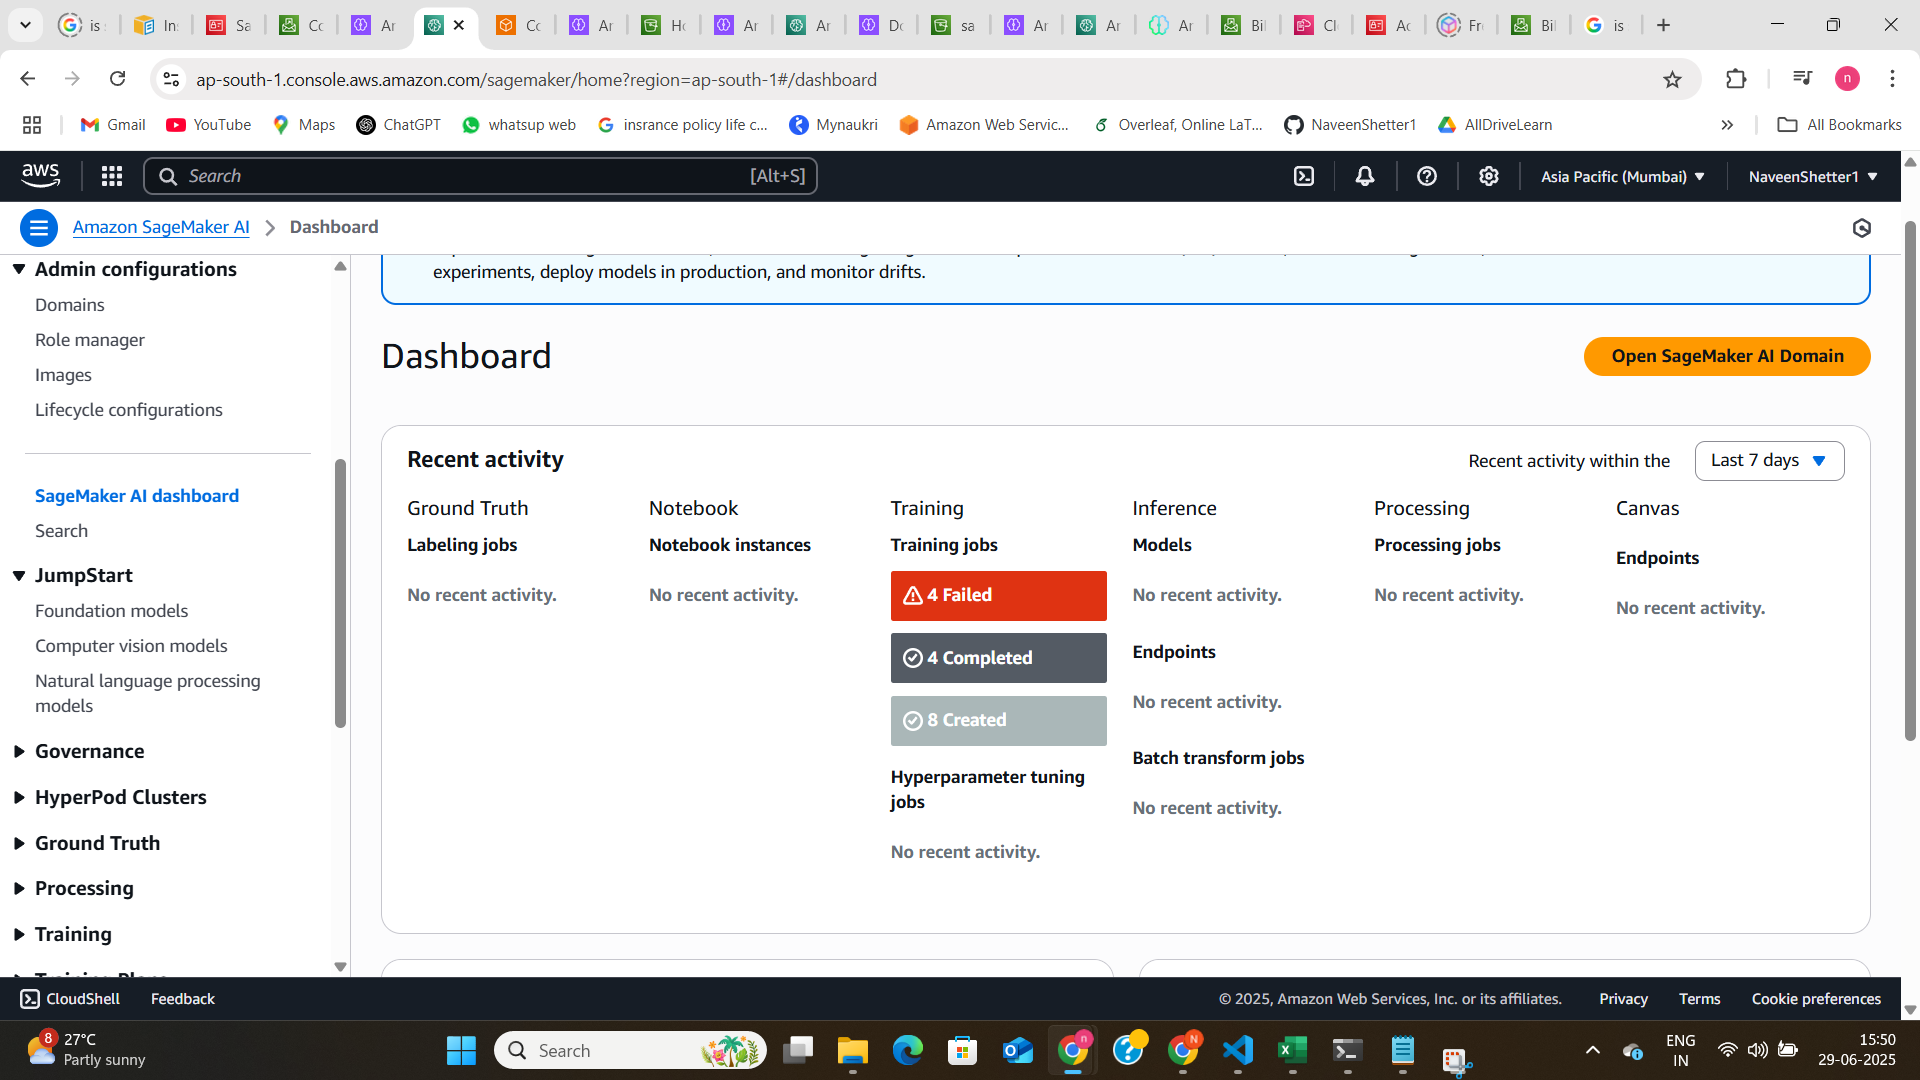

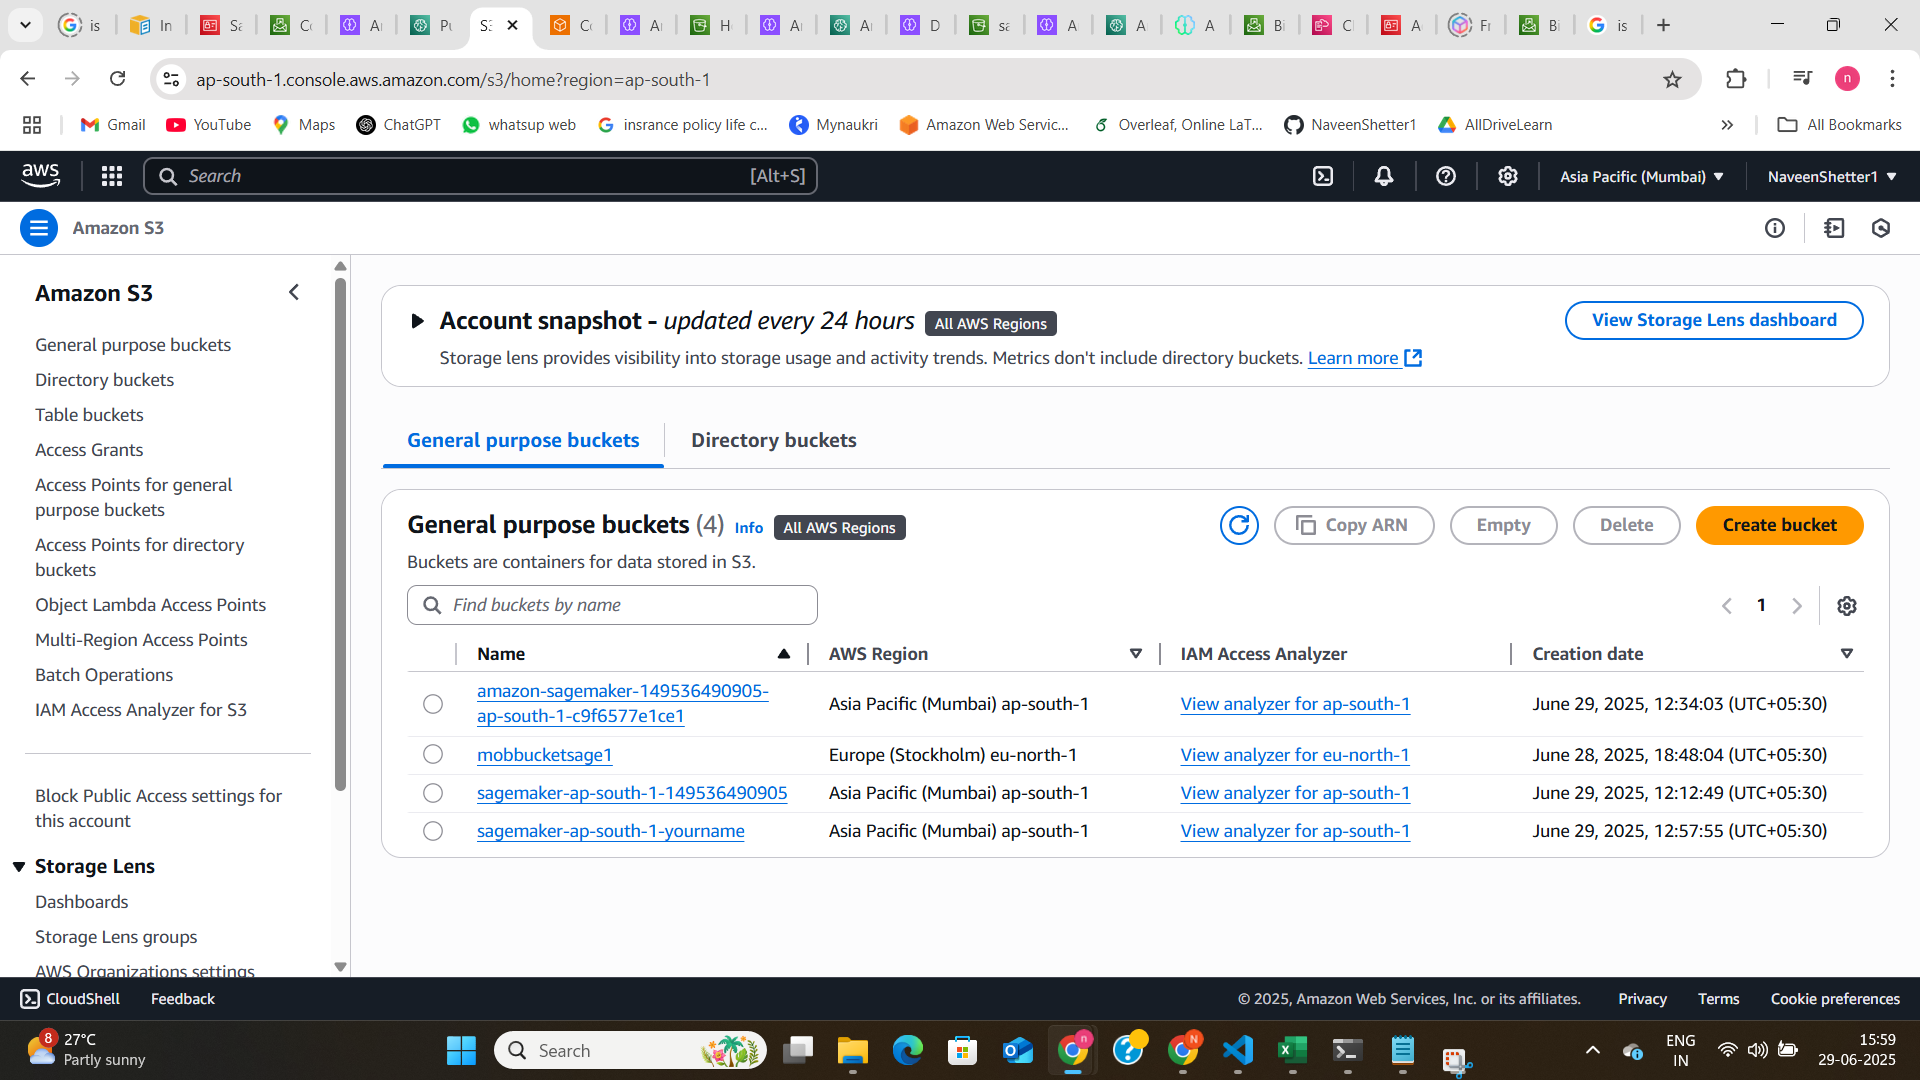

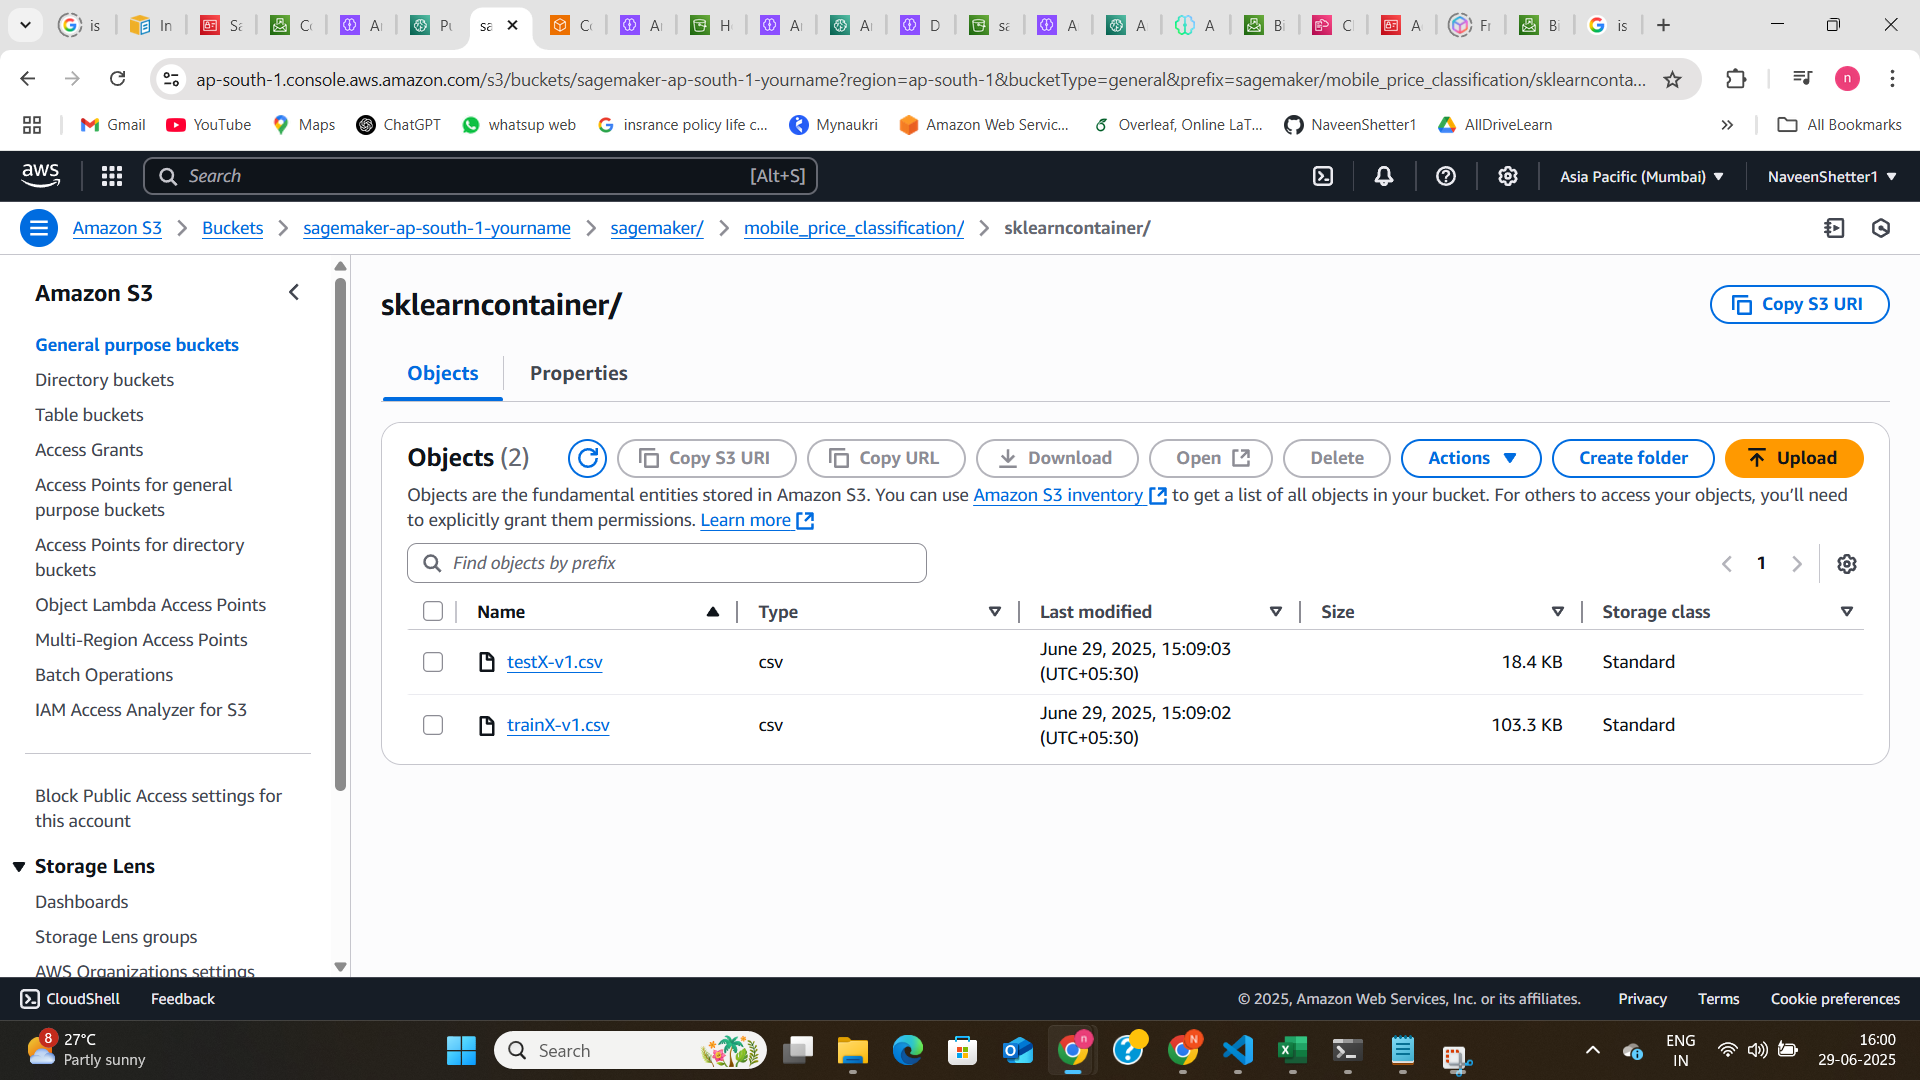

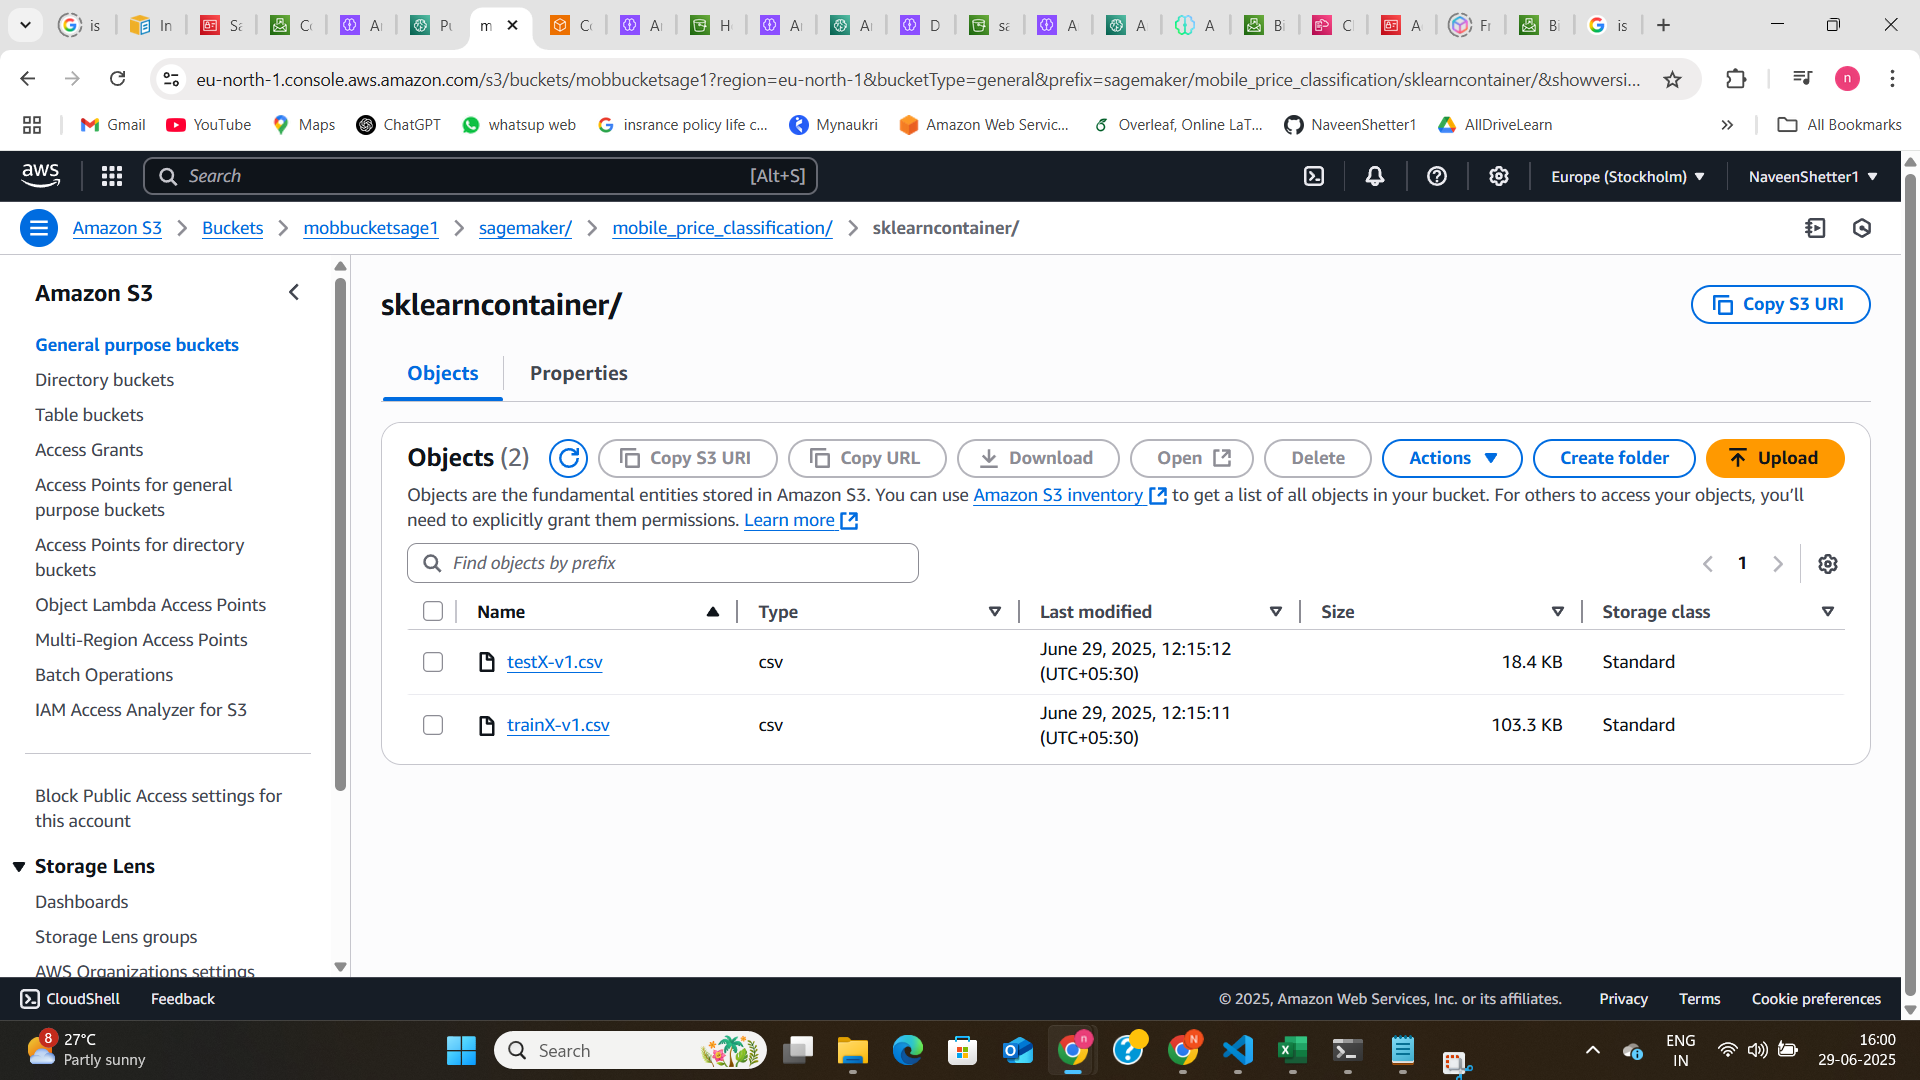

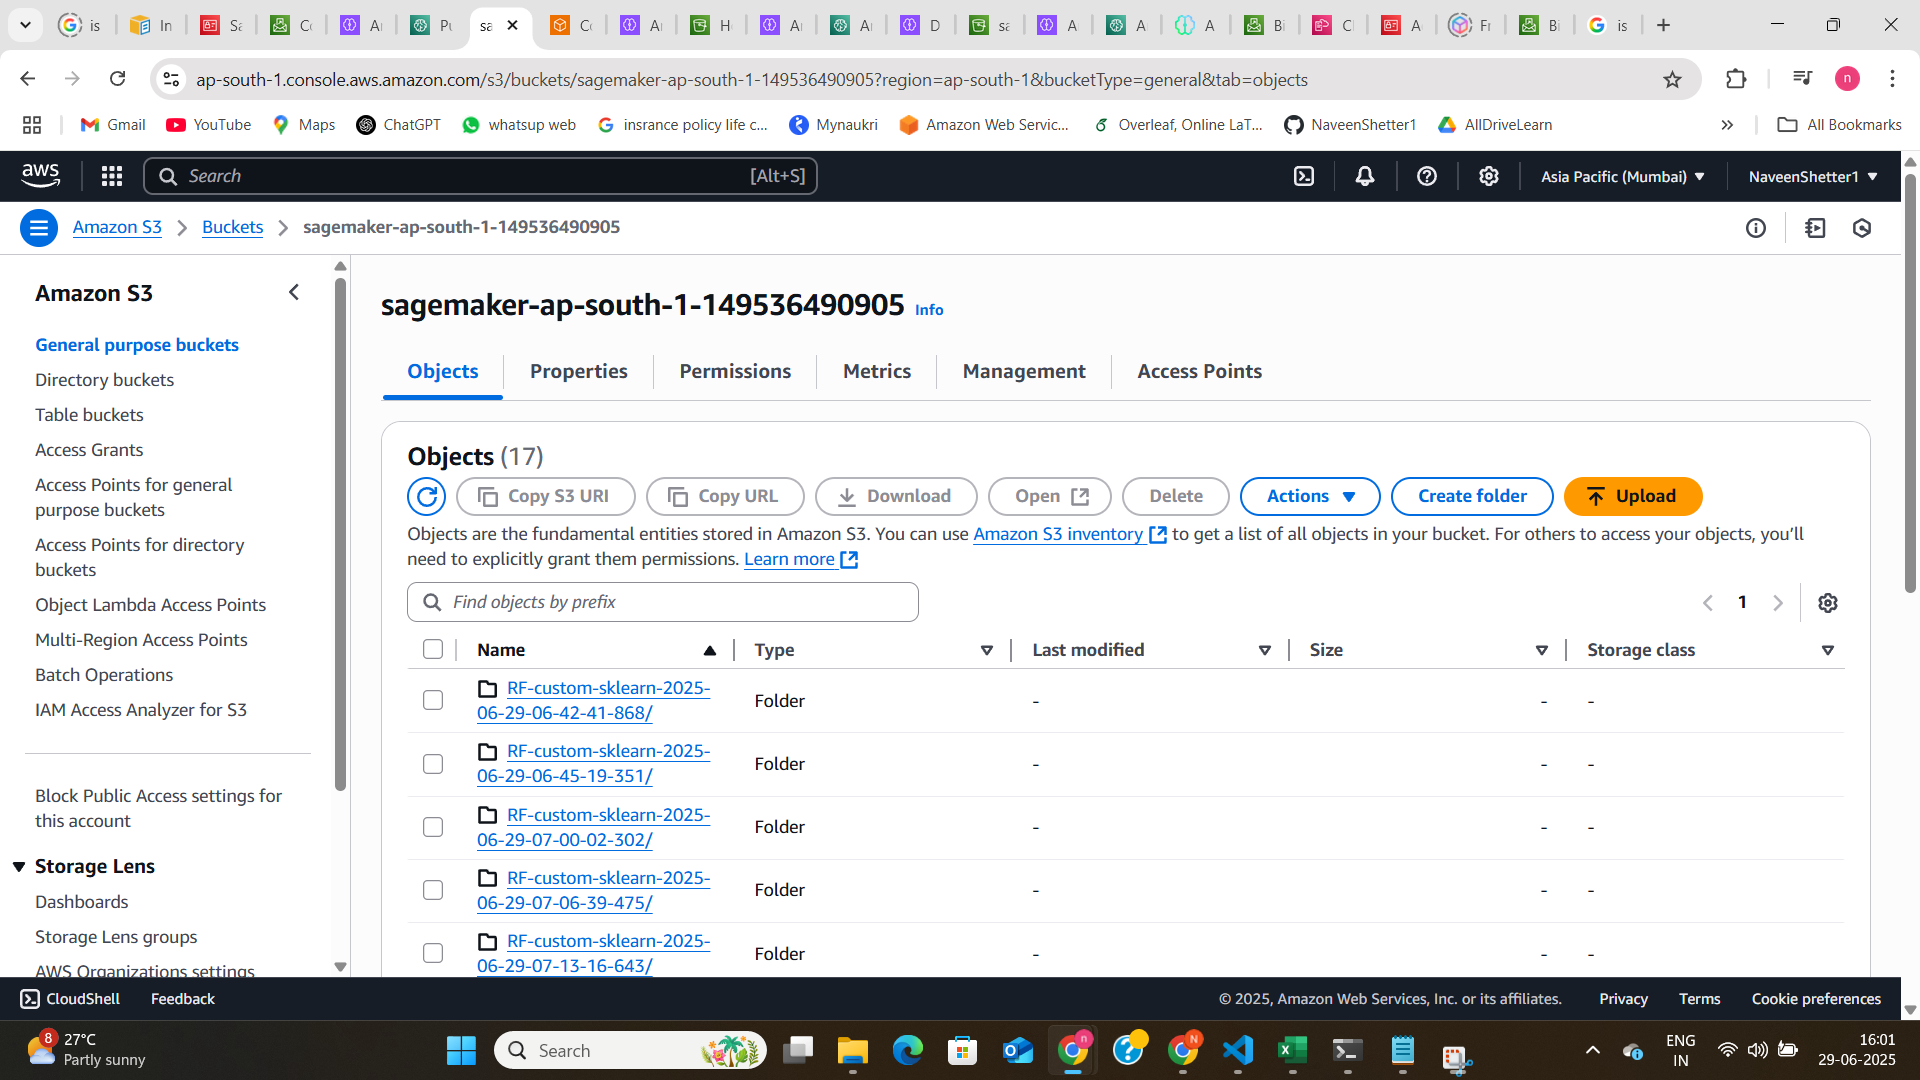

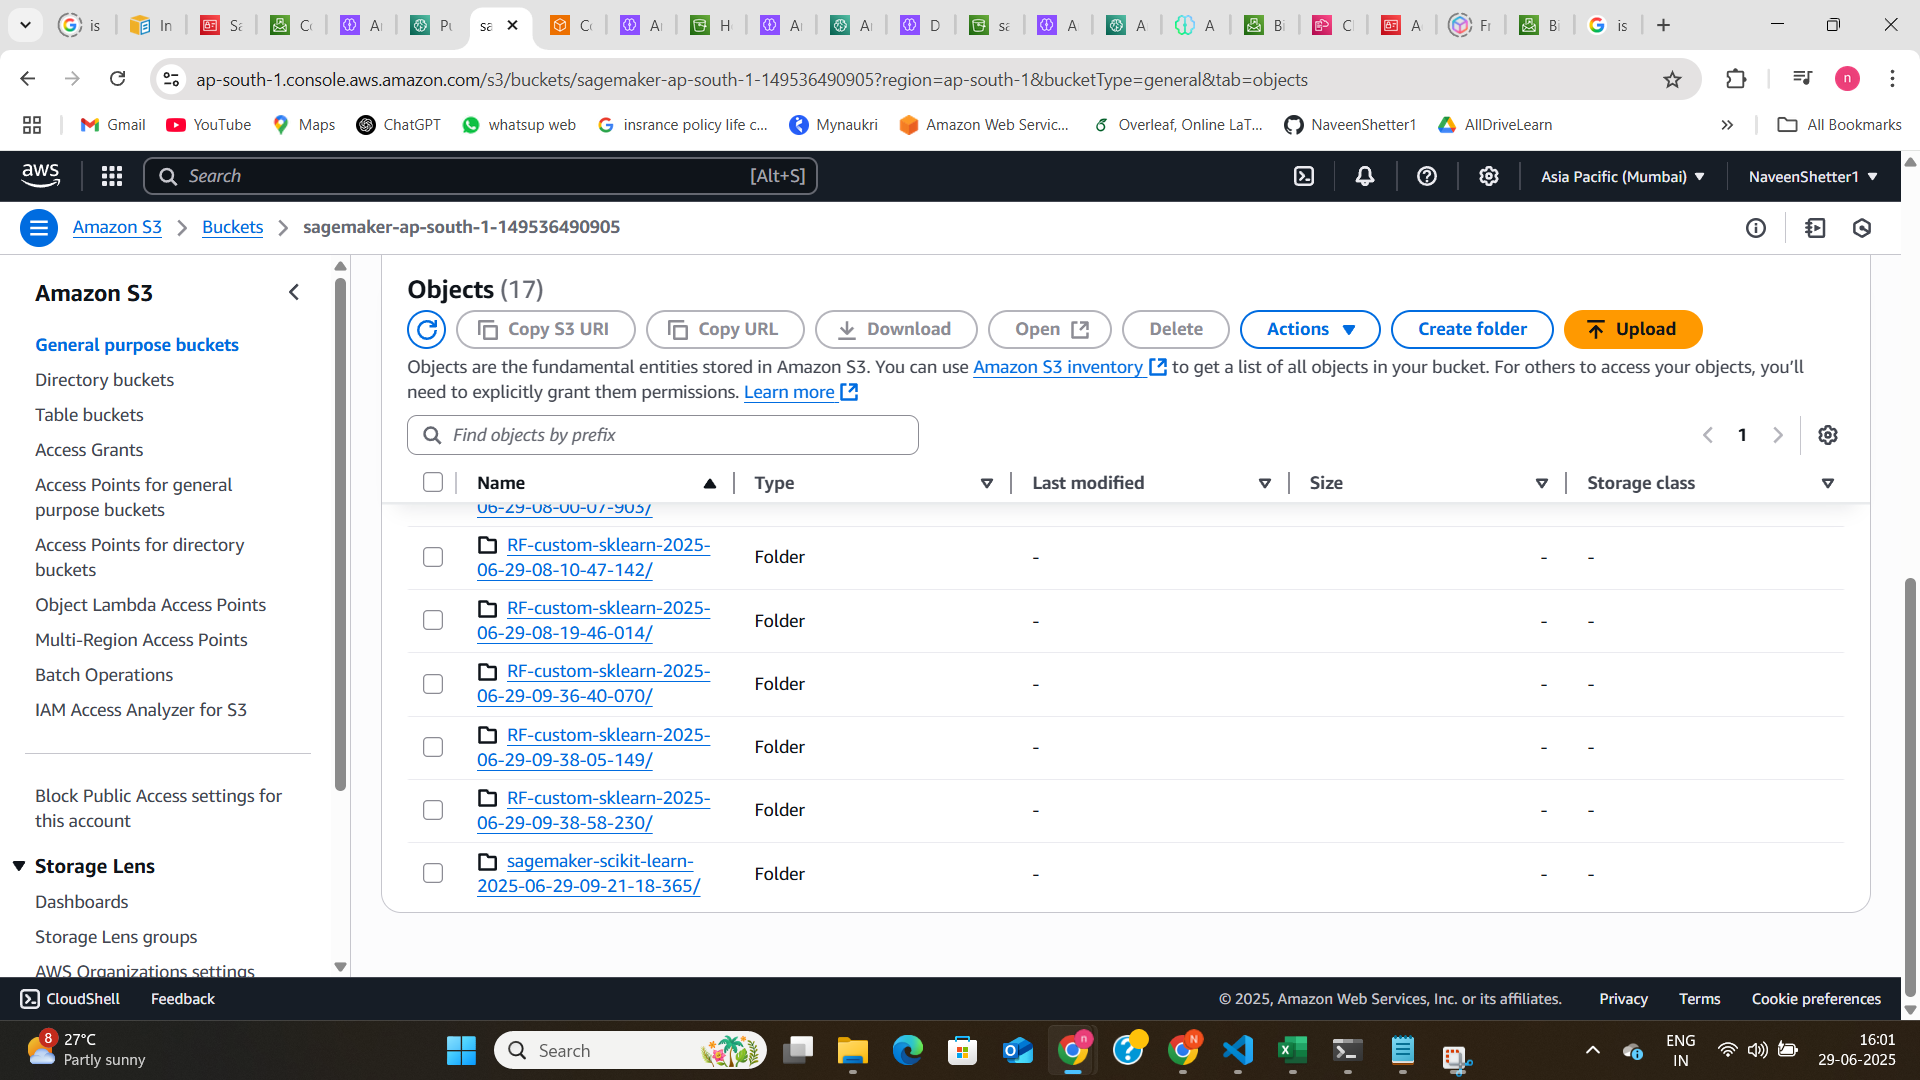

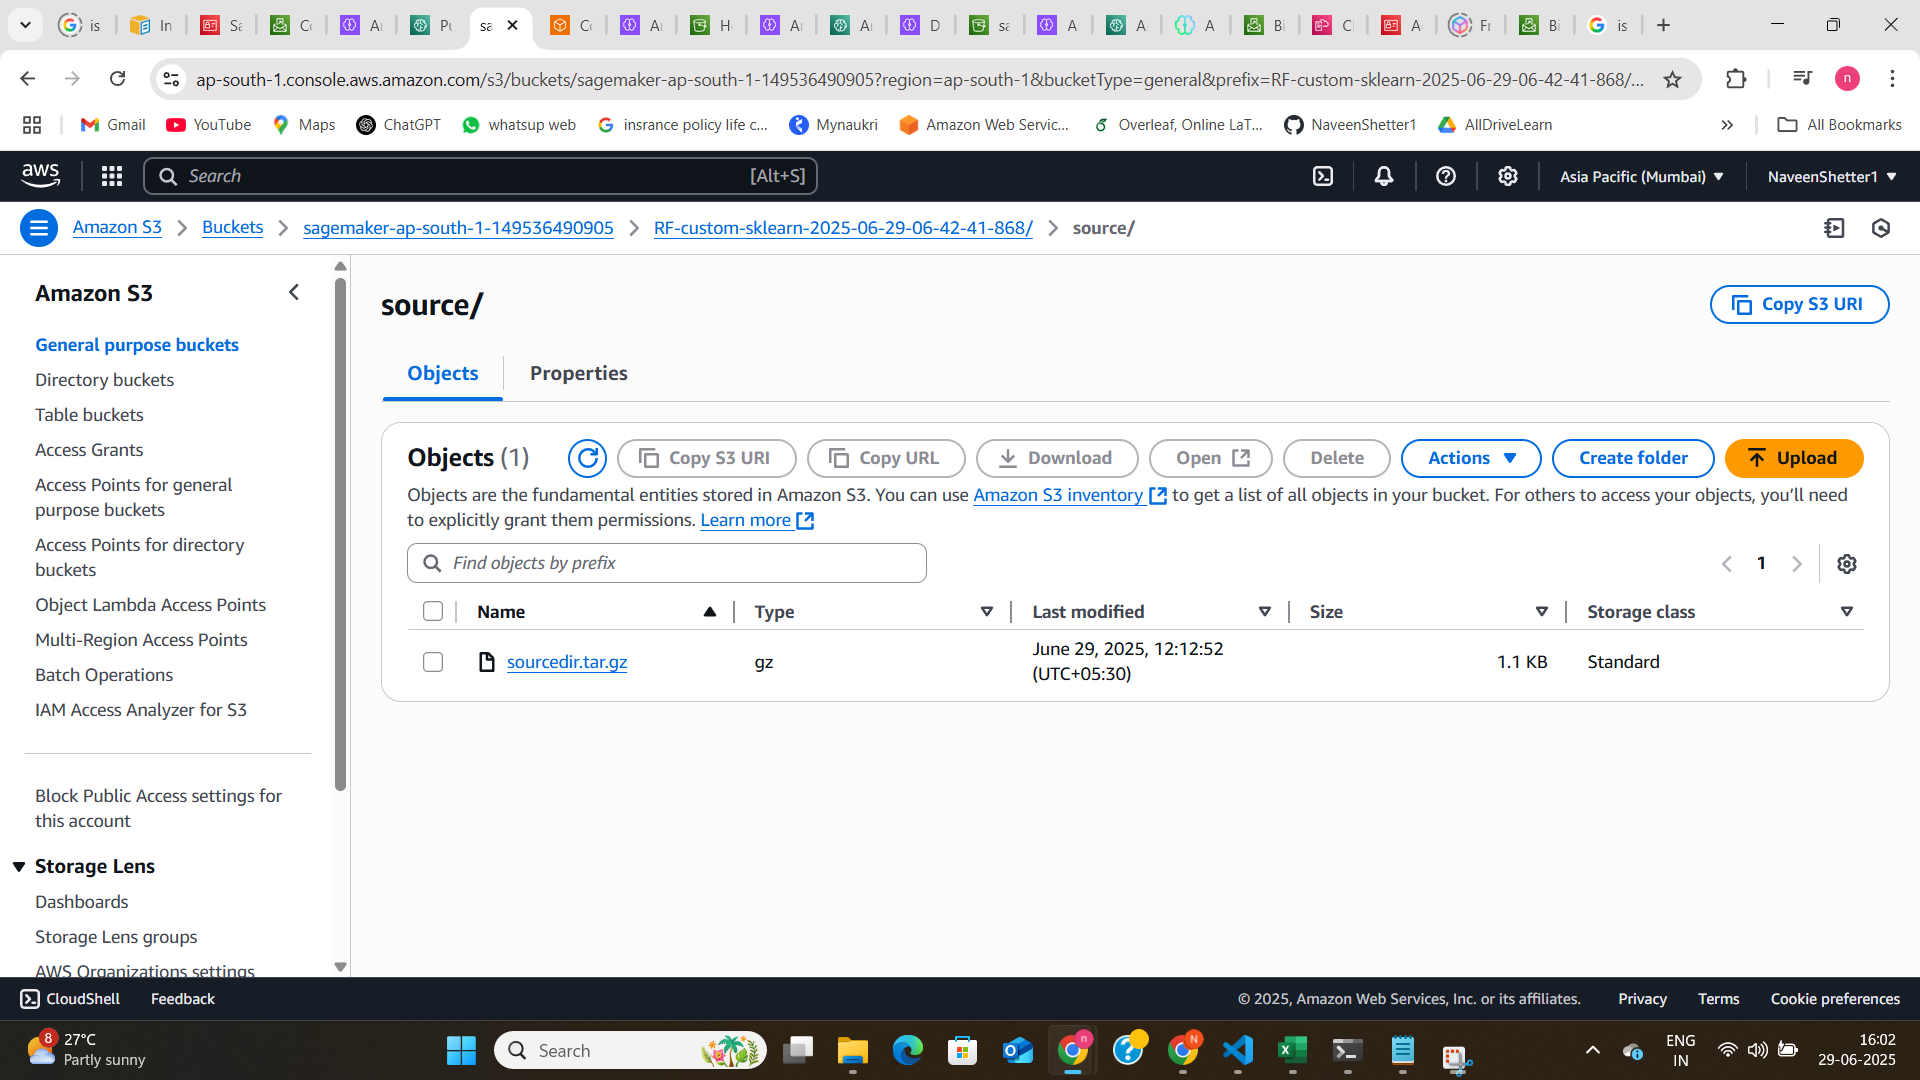

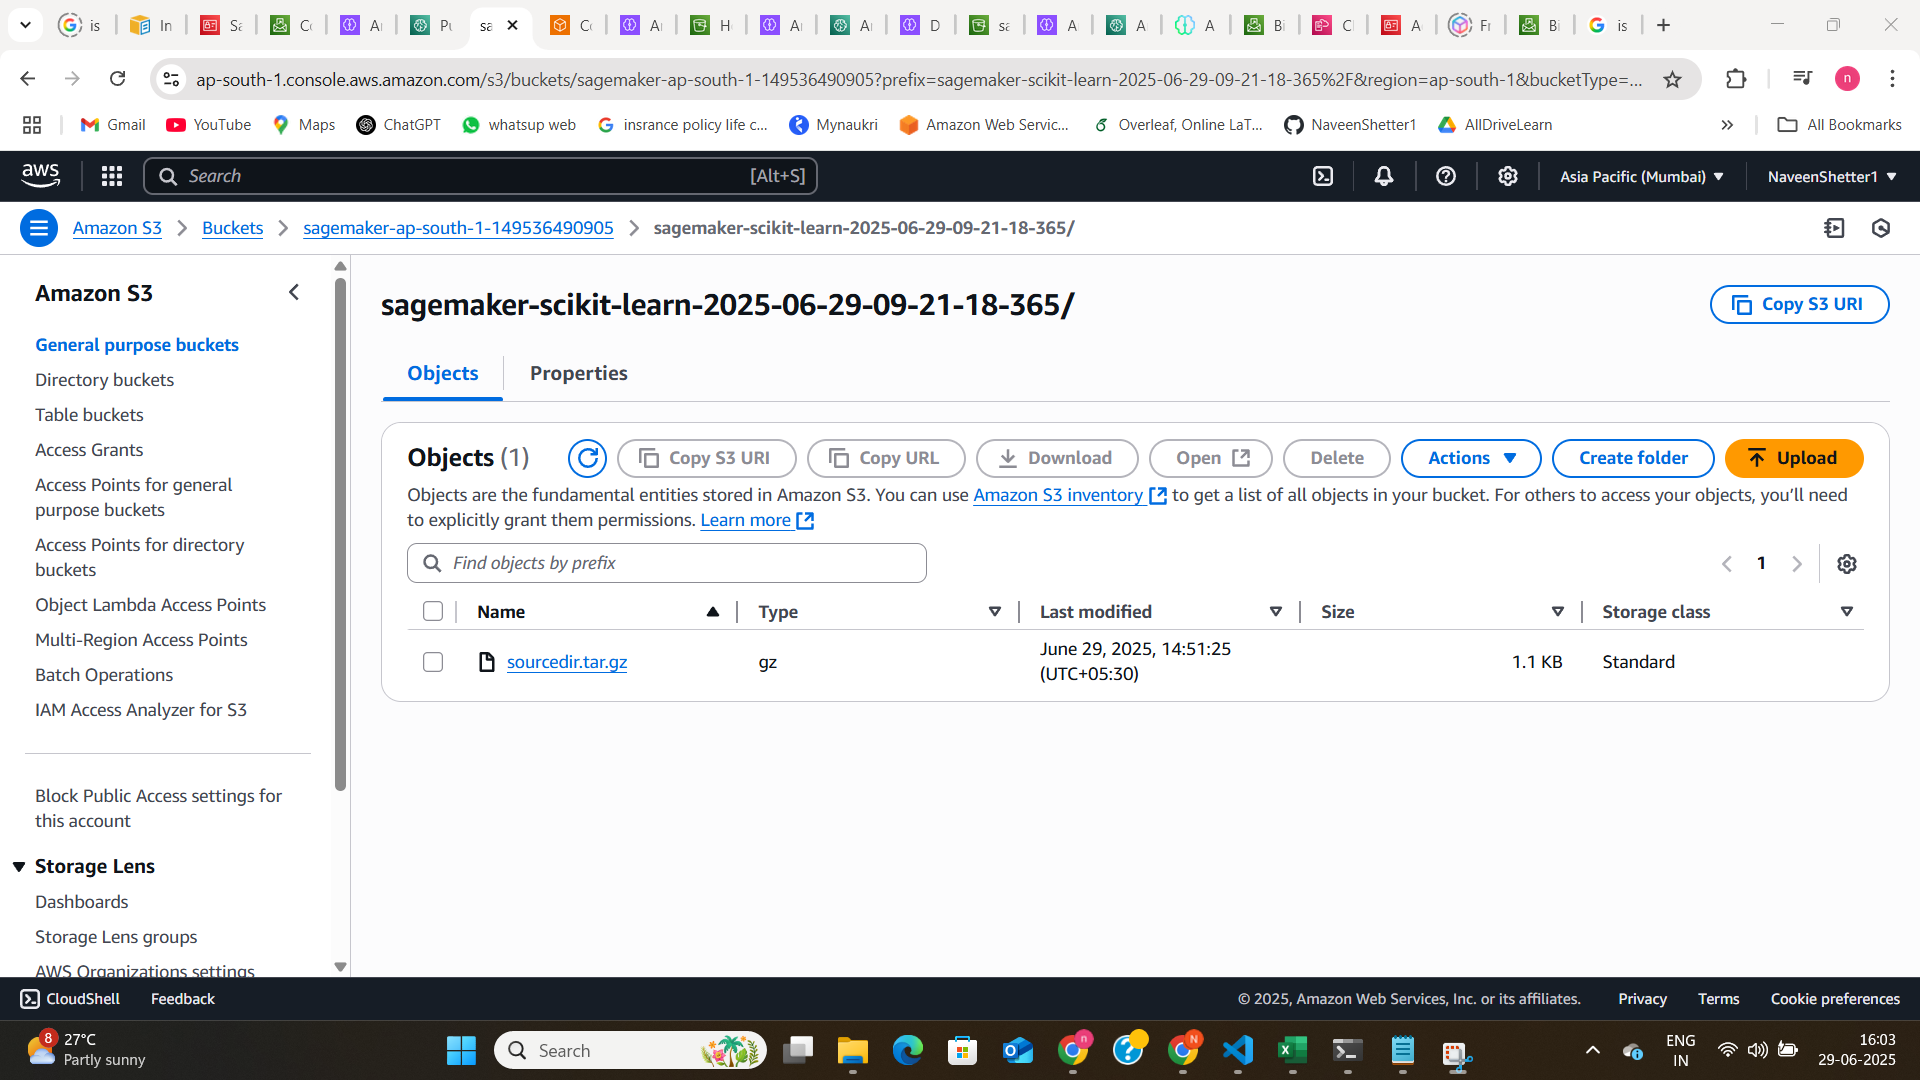

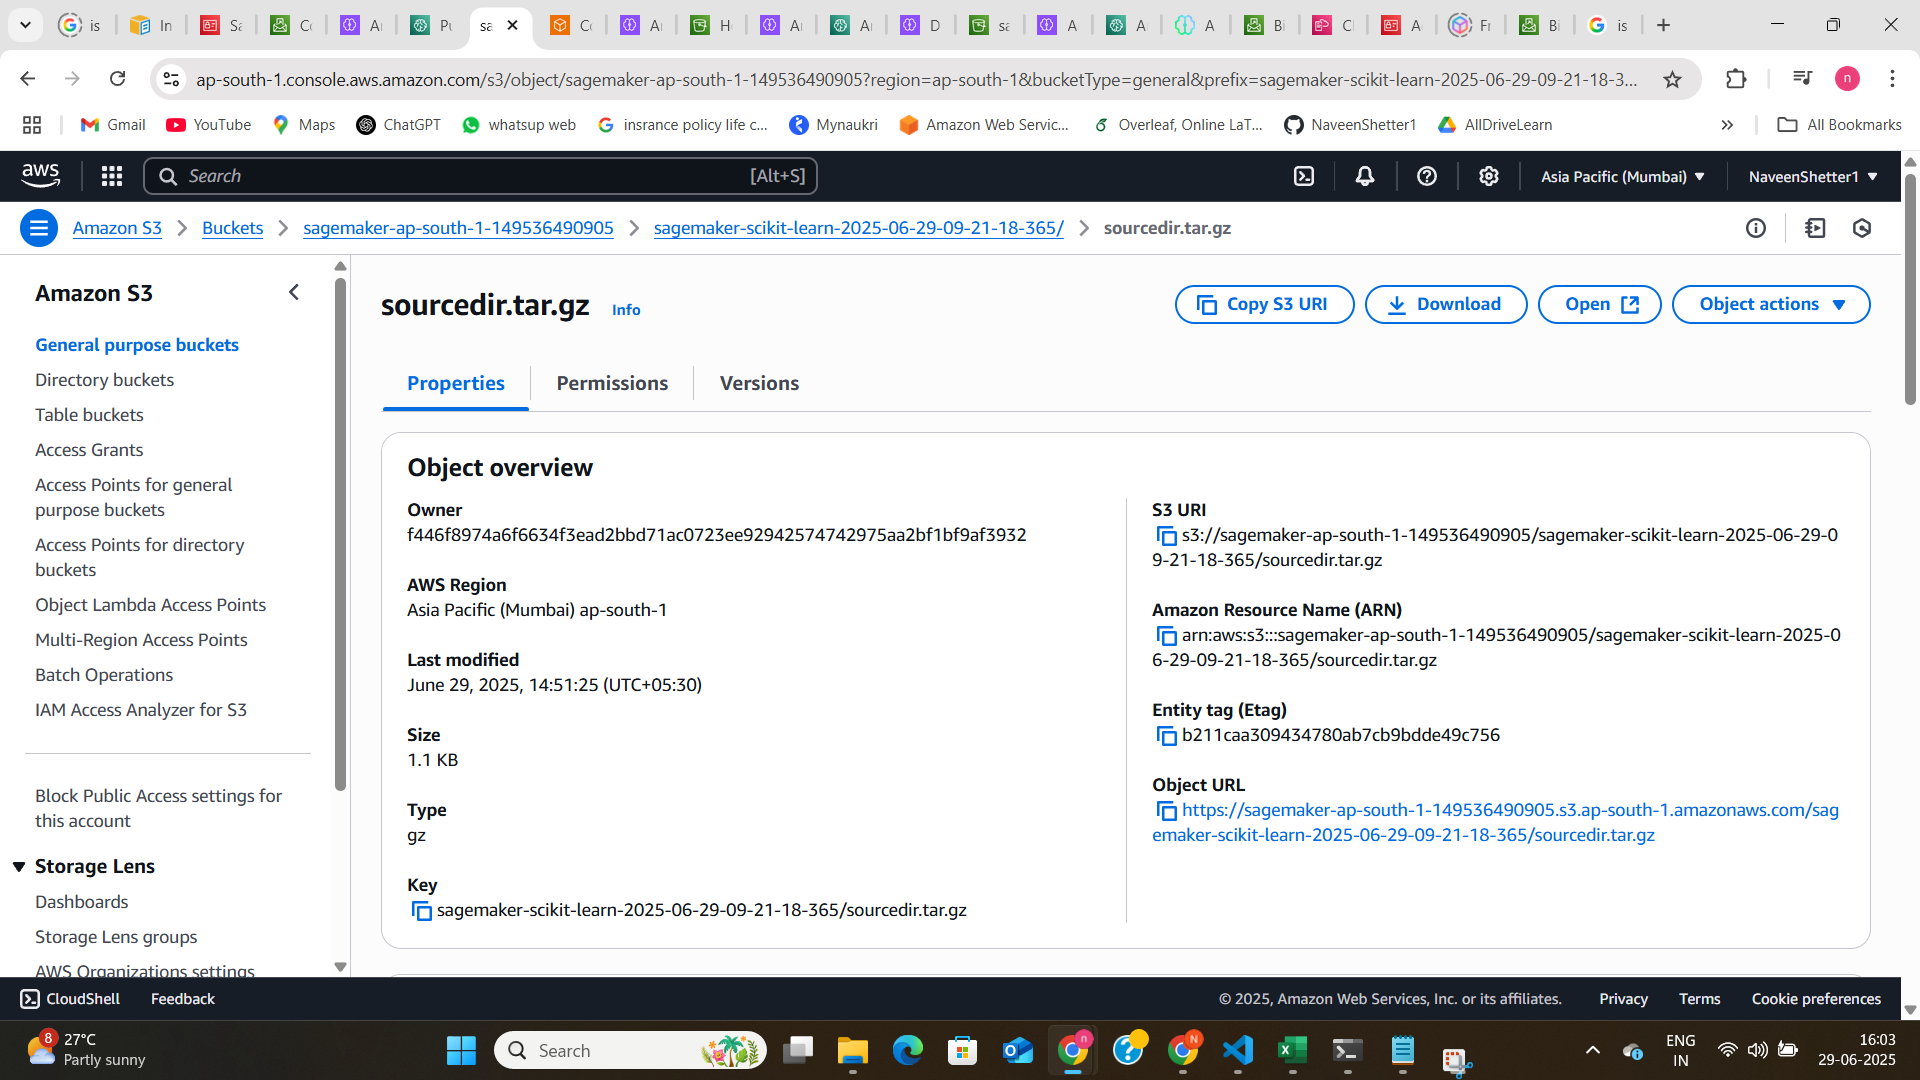

<!-- deleted all the above buckets -->

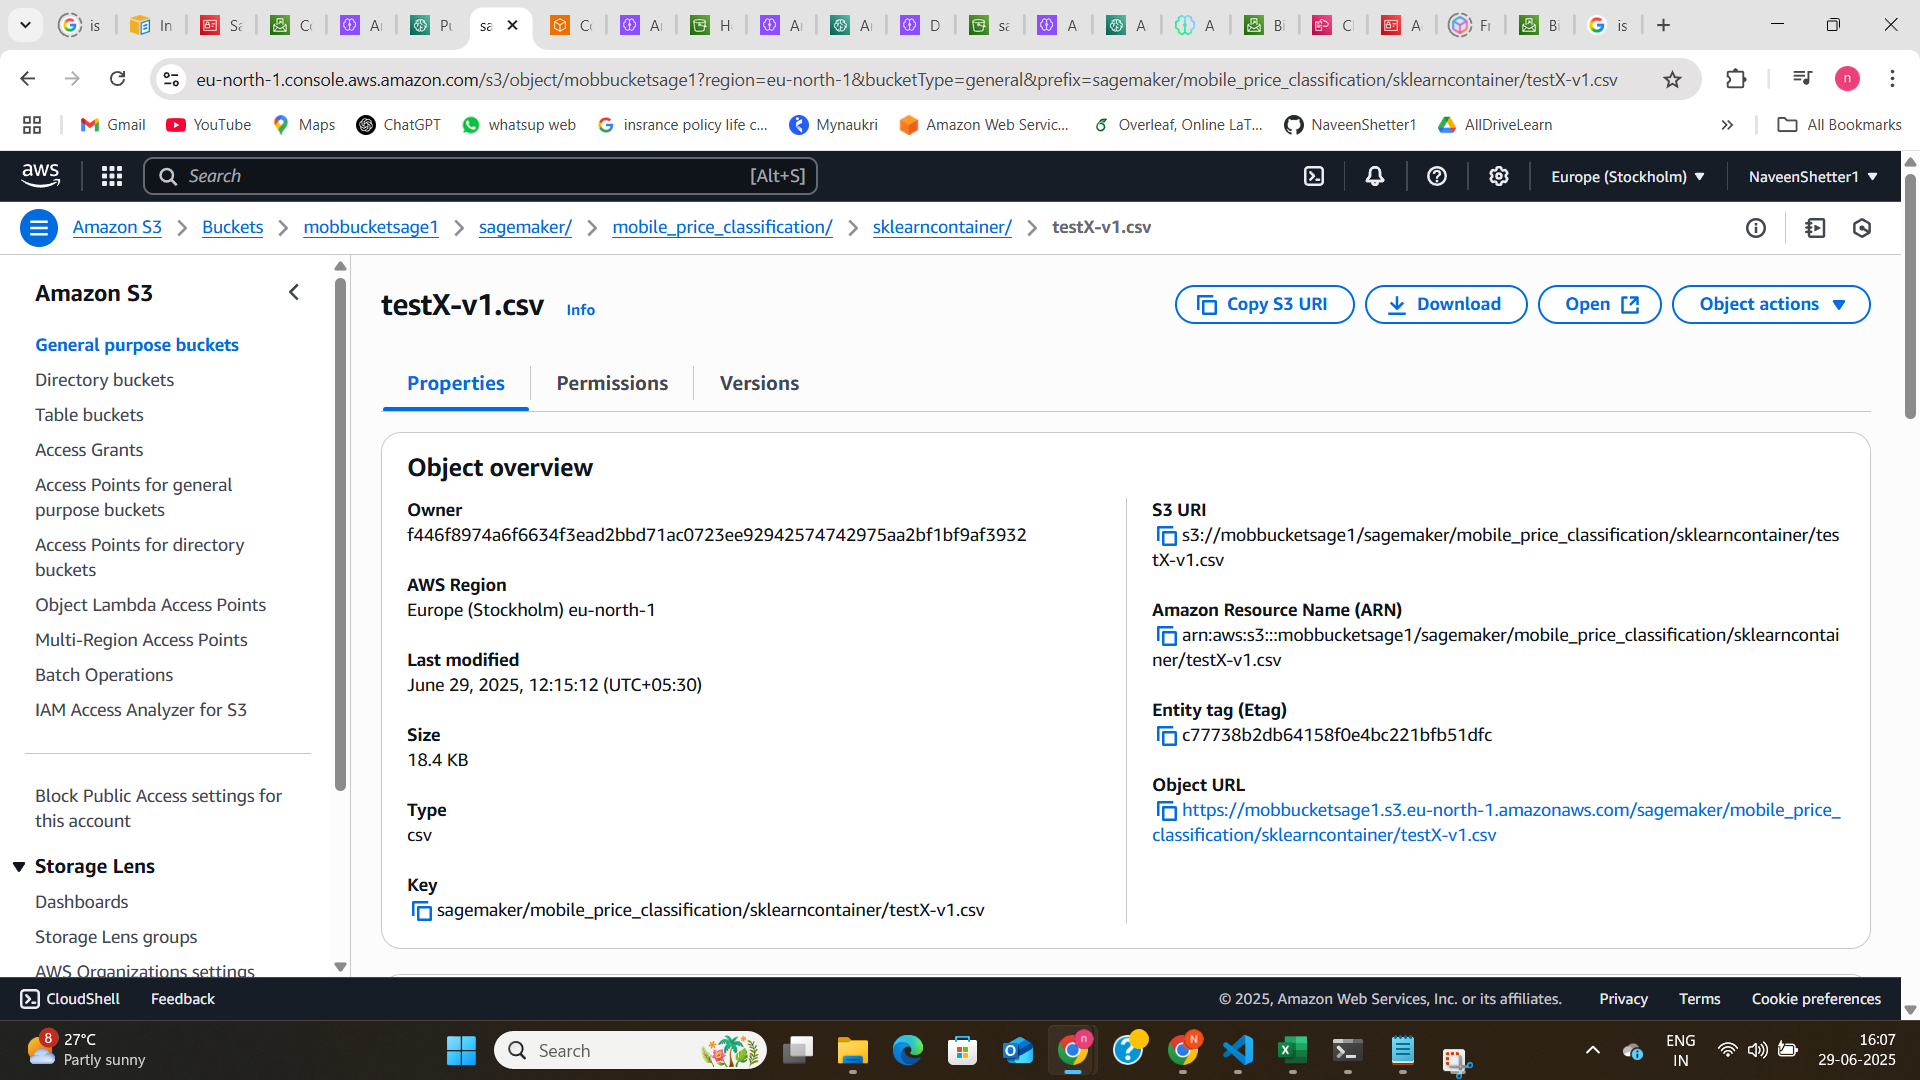